## Imports

In [1]:
from NuestrasFunciones import *
import NuestrasFunciones 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno   
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer
import feature_engine.imputation as fe_imp
import ydata_profiling
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import patsy
from statsmodels.formula.api import logit 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

## 2. Data preprocessing and cleaning

In [2]:
data = pd.read_csv('framingham.csv')
data

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]

 Variable Description: 
 - Male: Yes (1) or No (0 = female)
 - Age: Age of the patient
 - Current Smoker: (1 Yes, 0 No)
 - Cigs Per Day: the number of cigarettes that the person smoked on average in one day (continous)
 - BP Meds: whether or not the patient was on blood pressure medication (Nominal)
 - Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
 - Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
 - Diabetes: whether or not the patient had diabetes (Nominal)
 - Tot Chol: total cholesterol level (Continuous)
 - Sys BP: systolic blood pressure (Continuous)
 - Dia BP: diastolic blood pressure (Continuous)
 - BMI: Body Mass Index (Continuous)
 - Heart Rate: heart rate (Continuous)
 - Glucose: glucose level (Continuous)
 - 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


There are some missings in education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose

We can see the variable education does not appear in the description table and since we don't have a source to rely on we will eliminate this column from our study

In [4]:
data = data.drop('education', axis=1)

We can see not all variables have the correct type of format. BPMeds should be an integer

In [5]:
data.nunique()

male                  2
age                  39
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [6]:
to_factor = list(data.loc[:,data.nunique() <= 10]);  
data[to_factor] = data[to_factor].astype('category')

In [7]:
data.describe()

age   cigsPerDay      totChol        sysBP        diaBP  \
count  4238.000000  4209.000000  4188.000000  4238.000000  4238.000000   
mean     49.584946     9.003089   236.721585   132.352407    82.893464   
std       8.572160    11.920094    44.590334    22.038097    11.910850   
min      32.000000     0.000000   107.000000    83.500000    48.000000   
25%      42.000000     0.000000   206.000000   117.000000    75.000000   
50%      49.000000     0.000000   234.000000   128.000000    82.000000   
75%      56.000000    20.000000   263.000000   144.000000    89.875000   
max      70.000000    70.000000   696.000000   295.000000   142.500000   

               BMI    heartRate      glucose  
count  4219.000000  4237.000000  3850.000000  
mean     25.802008    75.878924    81.966753  
std       4.080111    12.026596    23.959998  
min      15.540000    44.000000    40.000000  
25%      23.070000    68.000000    71.000000  
50%      25.400000    75.000000    78.000000  
75%      28.040000    83.000000    87.000000  
max      56.800000   143.000000   394.000000

In [8]:
data.describe(exclude=np.number)

male  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
count   4238           4238  4185.0             4238          4238      4238   
unique     2              2     2.0                2             2         2   
top        0              0     0.0                0             0         0   
freq    2419           2144  4061.0             4213          2922      4129   

        TenYearCHD  
count         4238  
unique           2  
top              0  
freq          3594

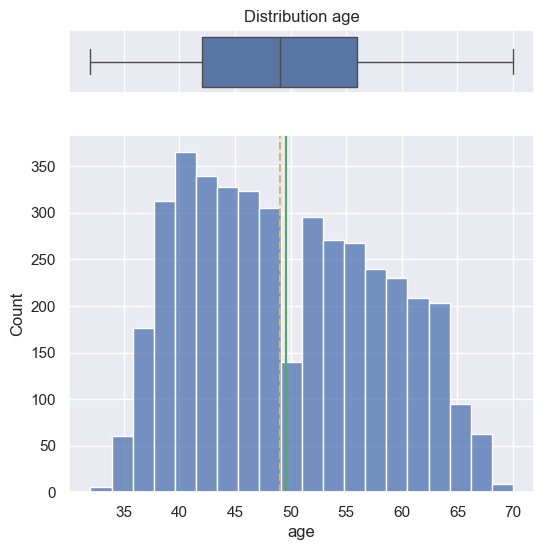

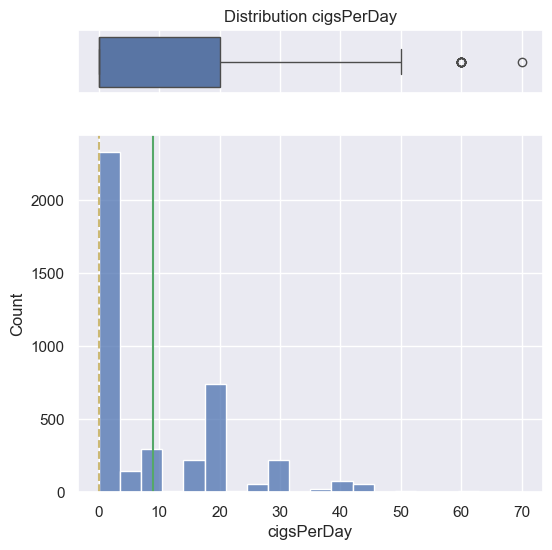

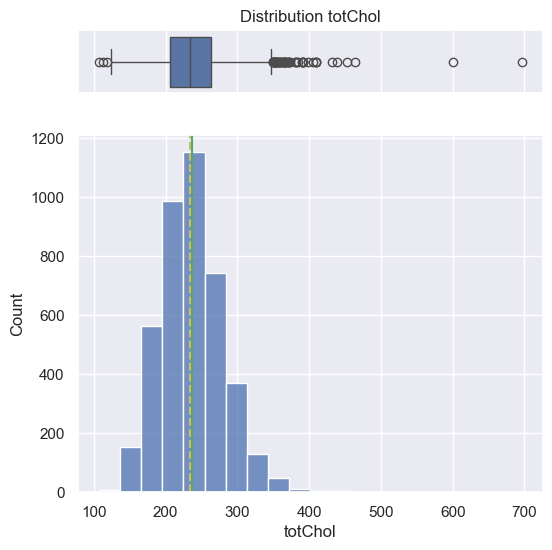

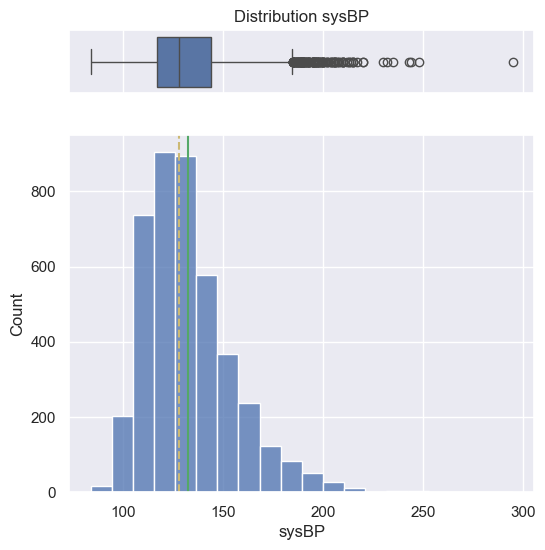

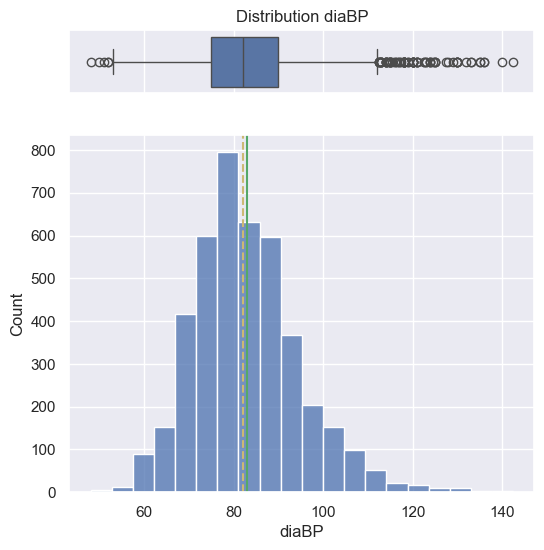

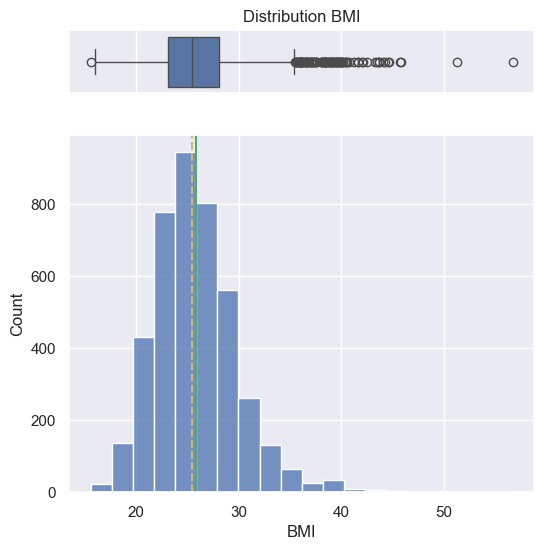

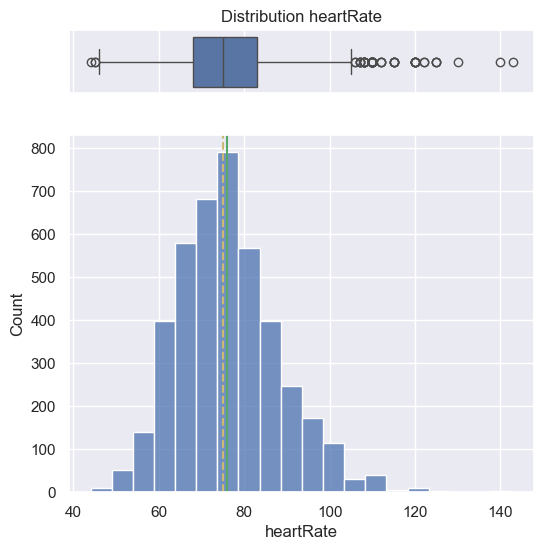

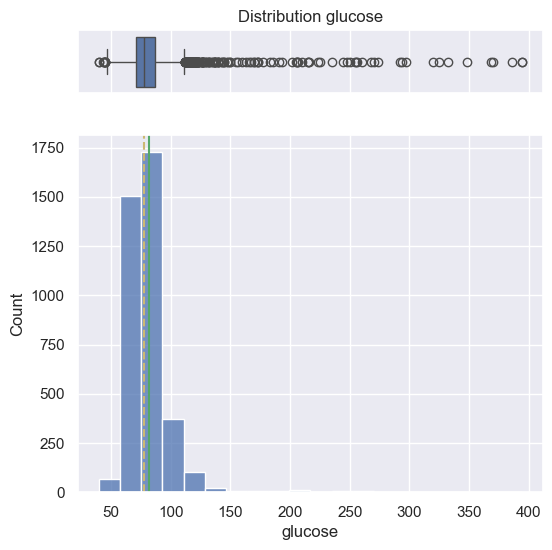

In [9]:
def histogram_boxplot(data, xlabel=None, title=None, font_scale=2, figsize=(6, 6), bins=None):
    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(x=data, ax=ax_box2)
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    ax_hist2.axvline(np.mean(data), color='g', linestyle='-')
    ax_hist2.axvline(np.median(data), color='y', linestyle='--')
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    plt.show()

def plot_all_continuous_variables(reincidencia, bins=20, font_scale=1, figsize=(9, 8)):
    for col_name in reincidencia.columns:
        col = reincidencia[col_name]
        # Verificar si es numérica y tiene suficientes valores únicos
        if pd.api.types.is_numeric_dtype(col) and col.nunique() > 10:
            title = f'Distribution {col_name}'
            histogram_boxplot(col.dropna(), bins=bins, font_scale=font_scale, title=title)

plot_all_continuous_variables(data, bins=20, font_scale=1)

In [10]:
def cat_plot(data):
    for col_name in data.columns:
        col = data[col_name]
        if col.dtypes == 'object' or col.dtypes.name == 'category':
            fig = px.bar(col.value_counts(), title=f'Distribution of {col_name}')
            fig.show()

cat_plot(data)       

There is data imbalance for the target variable, 3594 negatives and 644 positive people that end up having heart diseases 10 years later

### Outliers

In [11]:
varObjBin=data.TenYearCHD
imput=data.drop(['TenYearCHD'],axis=1)

In [12]:
imput.select_dtypes(include=np.number).apply(lambda x: x.skew())

age           0.228146
cigsPerDay    1.247910
totChol       0.871422
sysBP         1.145362
diaBP         0.714102
BMI           0.981974
heartRate     0.644482
glucose       6.213402
dtype: float64

cigsPerDay, sysBP have a slight skewness, while glucose is extremely skewed with values over 6

In [13]:
asymmetric_columns = ['cigsPerDay', 'sysBP', 'glucose']

In [14]:
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher')) 

In [15]:
def gestiona_outliers(col, clas='check'):
    print(col.name)
    
    median = col.median()
    mad = (abs(col - median)).mean()
    
    if abs(col.skew()) < 1:
        criterio1 = abs((col - col.mean()) / col.std()) > 3
    else:
        criterio1 = abs((col - median) / mad) > 8
    
    q1 = col.quantile(0.25)  
    q3 = col.quantile(0.75)
    IQR = q3 - q1
    criterio2 = (col < (q1 - 3 * IQR)) | (col > (q3 + 3 * IQR))
    
    lower = col[criterio1 & criterio2 & (col < q1)].count() / col.dropna().count()
    upper = col[criterio1 & criterio2 & (col > q3)].count() / col.dropna().count()
    
    if clas == 'check':
        return (lower * 100, upper * 100, (lower + upper) * 100)
    elif clas == 'winsor':
        lower_bound = q1 - 3 * IQR
        upper_bound = q3 + 3 * IQR
        return col.clip(lower=lower_bound, upper=upper_bound)
    elif clas == 'miss':
        print('\nMissingAntes: ' + str(col.isna().sum()))
        col.loc[criterio1 & criterio2] = np.nan
        print('MissingDespues: ' + str(col.isna().sum()) + '\n')
        return col

In [16]:
dataCont = imput.select_dtypes(include=np.number).copy()
data_winsor = dataCont.apply(lambda x: gestiona_outliers(x,clas='winsor'))

age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose


In [17]:
data_winsor.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0   39         0.0    195.0  106.0   70.0  26.97       80.0     77.0
1   46         0.0    250.0  121.0   81.0  28.73       95.0     76.0
2   48        20.0    245.0  127.5   80.0  25.34       75.0     70.0
3   61        30.0    225.0  150.0   95.0  28.58       65.0    103.0
4   46        23.0    285.0  130.0   84.0  23.10       85.0     85.0

In [18]:
data_winsor.max()

age            70.00
cigsPerDay     70.00
totChol       434.00
sysBP         225.00
diaBP         134.50
BMI            42.95
heartRate     128.00
glucose       135.00
dtype: float64

Max values went from:
    
   - cigsPerDay before: 70 - after: 70
   - sysBP before: 295 - after: 225
   - glucose before 394 - after 135

In [19]:
imput_wins = data_winsor.join(imput.select_dtypes(exclude=np.number))

In [20]:
imput_wins.describe()

age   cigsPerDay      totChol        sysBP        diaBP  \
count  4238.000000  4209.000000  4188.000000  4238.000000  4238.000000   
mean     49.584946     9.003089   236.606495   132.316541    82.889335   
std       8.572160    11.920094    43.813023    21.852803    11.891955   
min      32.000000     0.000000   107.000000    83.500000    48.000000   
25%      42.000000     0.000000   206.000000   117.000000    75.000000   
50%      49.000000     0.000000   234.000000   128.000000    82.000000   
75%      56.000000    20.000000   263.000000   144.000000    89.875000   
max      70.000000    70.000000   434.000000   225.000000   134.500000   

               BMI    heartRate      glucose  
count  4219.000000  4237.000000  3850.000000  
mean     25.793468    75.872079    80.564675  
std       4.035604    11.993218    14.767290  
min      15.540000    44.000000    40.000000  
25%      23.070000    68.000000    71.000000  
50%      25.400000    75.000000    78.000000  
75%      28.040000    83.000000    87.000000  
max      42.950000   128.000000   135.000000

### Missings

In [21]:
missing_percentage = imput_wins.apply(lambda x: x.isna().sum() / x.count() * 100)
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage

cigsPerDay     0.689000
totChol        1.193887
BMI            0.450344
heartRate      0.023602
glucose       10.077922
BPMeds         1.266428
dtype: float64

The variable glucose is the one that presents the highest percentage of missing variables with a 10%

<Axes: >

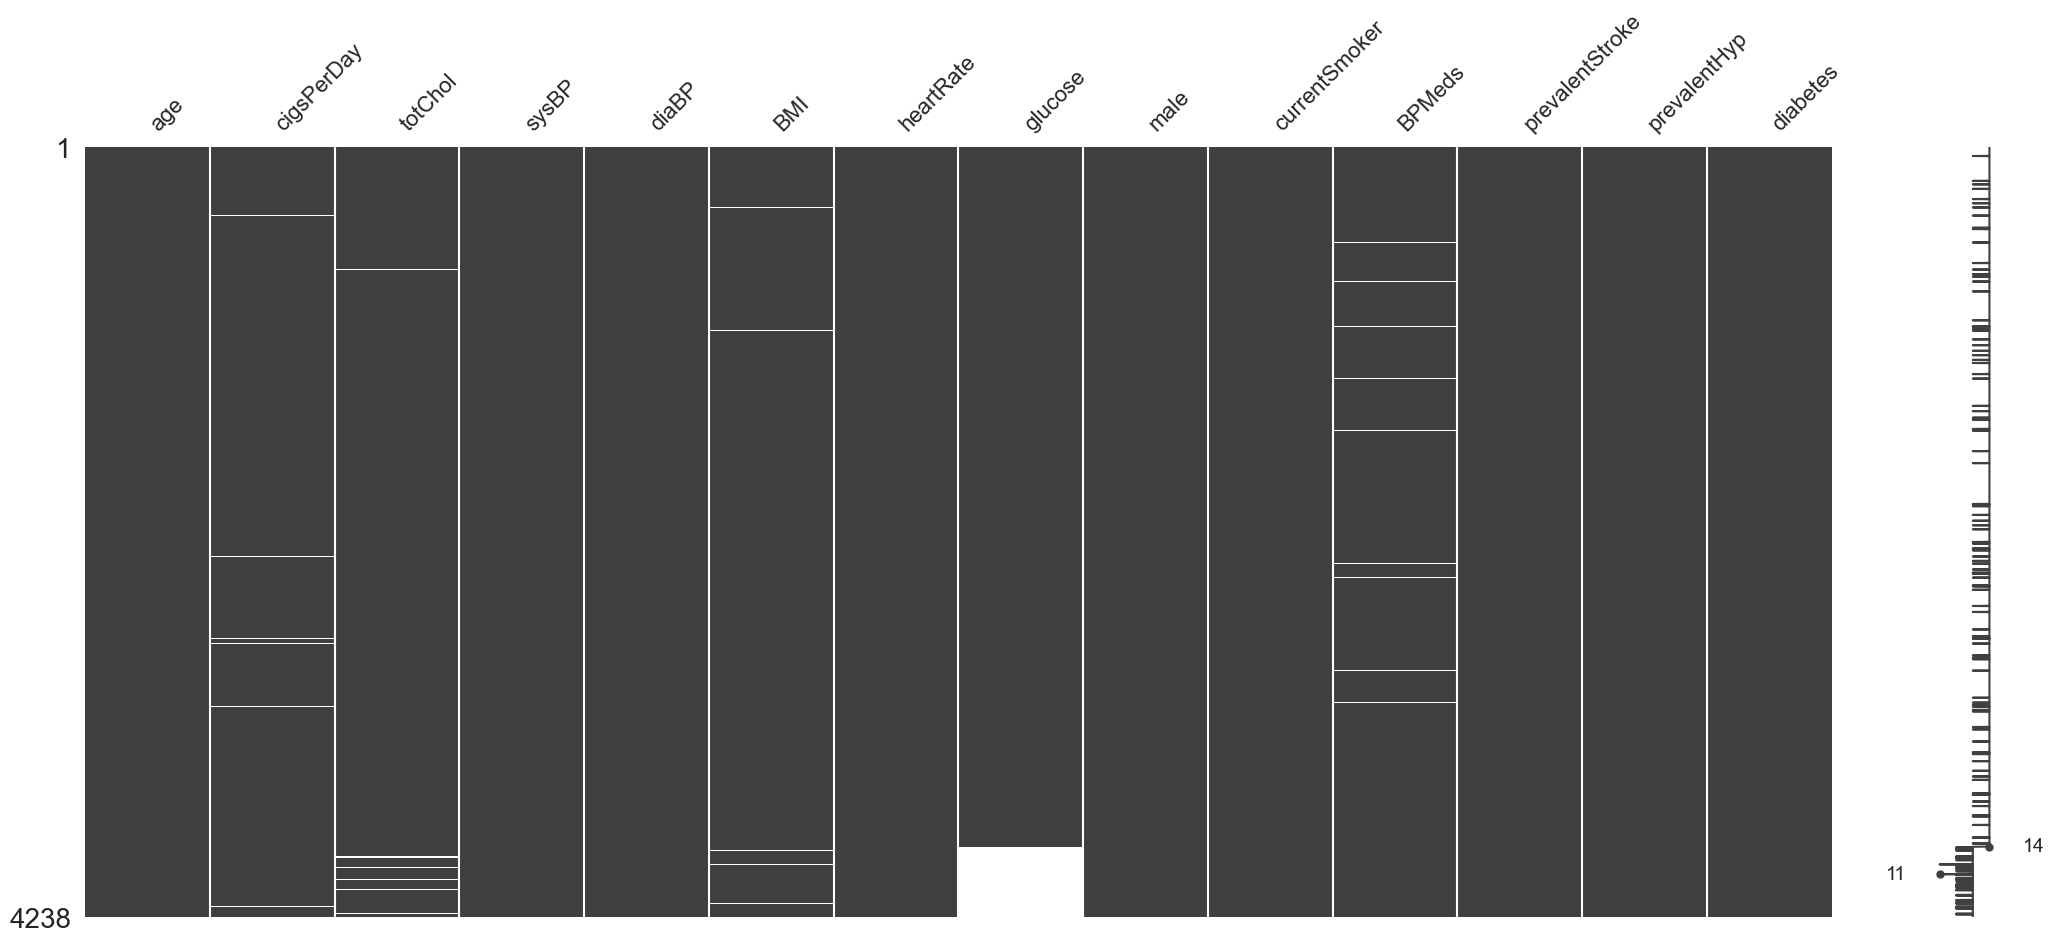

In [22]:
msno.matrix(imput_wins.sort_values(by='glucose'))

There is not a clear pattern of missings which is good, it could just be random, maybe they just weren't as thorough capturing data for glucose levels

In [23]:
imput_wins['prop_missings']=imput_wins.apply(lambda x: x.isna().sum()/x.count()*100, axis=1)
imput_wins.prop_missings.describe()

count    4238.000000
mean        0.996341
std         2.929895
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        27.272727
Name: prop_missings, dtype: float64

<Axes: >

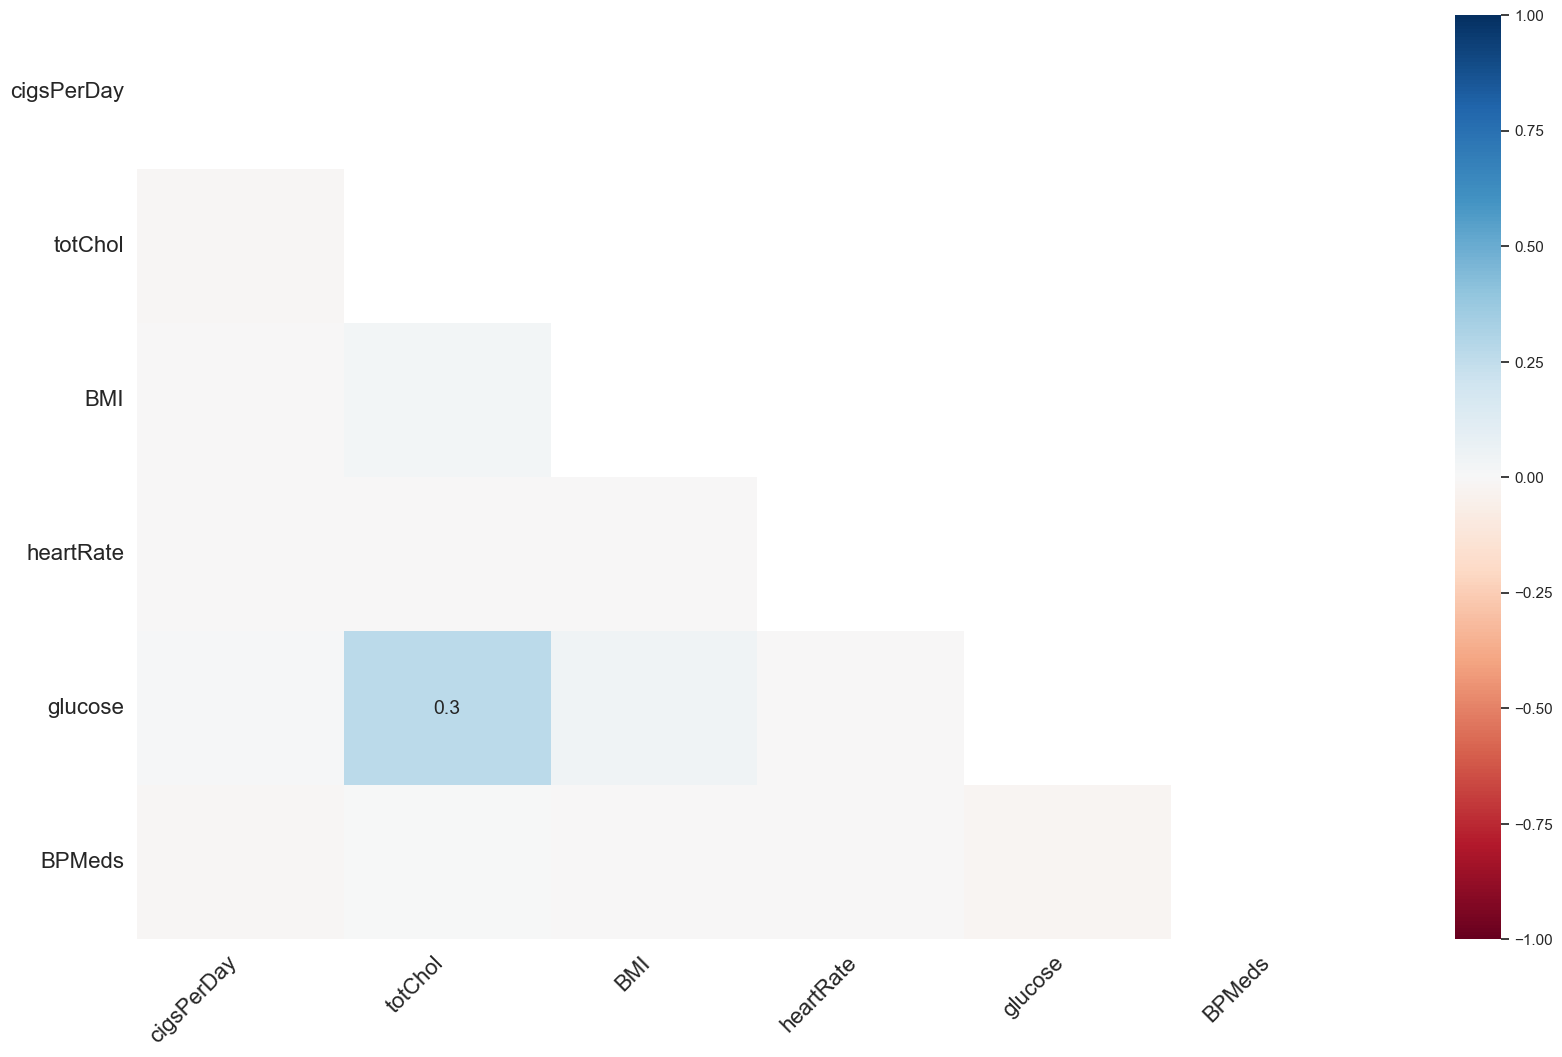

In [24]:
msno.heatmap(imput_wins)

In [25]:
imput_wins.sort_values(by='prop_missings', ascending=False).head(3)

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose male  \
1122   67         6.0      NaN  120.0   67.0  32.77       86.0      NaN    0   
1747   51         0.0      NaN  130.0   89.5    NaN       80.0      NaN    0   
3660   62         0.0      NaN  122.0   75.5  23.03       75.0      NaN    0   

     currentSmoker BPMeds prevalentStroke prevalentHyp diabetes  prop_missings  
1122             1    NaN               0            0        0      27.272727  
1747             0    0.0               0            0        0      27.272727  
3660             0    0.0               0            0        0      16.666667

The rows with the highest missing values has 27% of missings, it means that it has 3 variables with missings out of 14, which is not crazy

**Imputations**

In [26]:
# Option 1: eliminate every missing value from the df 

imput_wins.dropna().describe()

age   cigsPerDay      totChol        sysBP        diaBP  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000   
mean     49.578821     9.005335   236.824220   132.328087    82.929448   
std       8.569322    11.922440    43.742214    21.854447    11.913773   
min      32.000000     0.000000   113.000000    83.500000    48.000000   
25%      42.000000     0.000000   206.000000   117.000000    75.000000   
50%      49.000000     0.000000   234.000000   128.000000    82.000000   
75%      56.000000    20.000000   264.000000   144.000000    90.000000   
max      70.000000    70.000000   434.000000   225.000000   134.500000   

               BMI    heartRate      glucose  prop_missings  
count  3749.000000  3749.000000  3749.000000         3749.0  
mean     25.800798    75.696186    80.491331            0.0  
std       4.019114    11.919699    14.731762            0.0  
min      15.540000    44.000000    40.000000            0.0  
25%      23.090000    68.000000    71.000000            0.0  
50%      25.410000    75.000000    78.000000            0.0  
75%      28.060000    82.000000    87.000000            0.0  
max      42.950000   128.000000   135.000000            0.0

We would go from 4238 rows to 3749... we'd be losing 11.5% of our data and given the fact that our dataset is not that big we would be making it even smaller so we are not going to do this. Since the missingness is random, imputation is a reasonable approach because it likely won't introduce bias and will help you preserve the full dataset.

In [27]:
# Mode: Only categoricals
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# Random: numericals and categoricals
imputer_rand = fe_imp.RandomSampleImputer()

In [28]:
ydata_profiling.ProfileReport(data)

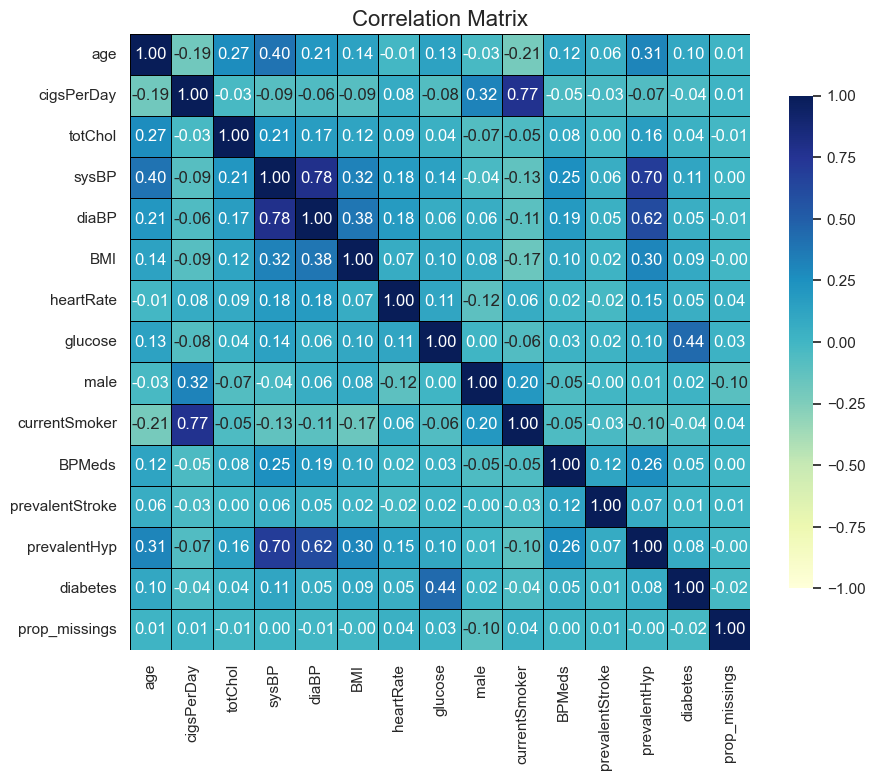

In [29]:
# Calculate correlation matrix
correlation_matrix = imput_wins.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,  
    cmap='YlGnBu', 
    fmt=".2f", 
    linewidths=0.5,  
    linecolor='black', 
    vmin=-1,  
    vmax=1,   
    center=0,  
    cbar_kws={"shrink": .8}  
)

plt.title("Correlation Matrix", fontsize=16)
plt.show()

We can observe there are some variables that are highly correlated. This is the case for:

 - CigsPerDay-currentSmoker (77% correlated)
 - sysBP-diaBP (78% correlated) and sysBP-prevalentHyp (70% correlated)
 - diaBP-prevalentHyp (62% correlated)
 - glucose-diabetes (44% correlated)

In [31]:
imput_wins_cont = imput_wins.select_dtypes(include=np.number)
imput_wins_cat = imput_wins.select_dtypes(exclude=np.number)

In [32]:
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)
imputer_itImp = skl_imp.IterativeImputer(max_iter=10, random_state=0)

imputer_rand = fe_imp.RandomSampleImputer()
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')

In [33]:
imput_wins_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)
#imput_wins_itImp_imputed = pd.DataFrame(imputer_itImp.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)

In [34]:
imput_wins_moda_imputed = pd.DataFrame(imputer_moda.fit_transform(imput_wins_cat),columns=imput_wins_cat.columns)

In [35]:
data_wins_knn_moda = pd.concat([imput_wins_knn_imputed,imput_wins_moda_imputed,varObjBin], axis=1)
data_wins_knn_moda.describe()

age   cigsPerDay      totChol        sysBP        diaBP  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean     49.584946     9.003775   236.622306   132.316541    82.889335   
std       8.572160    11.889170    43.655176    21.852803    11.891955   
min      32.000000     0.000000   107.000000    83.500000    48.000000   
25%      42.000000     0.000000   206.000000   117.000000    75.000000   
50%      49.000000     0.000000   234.000000   128.000000    82.000000   
75%      56.000000    20.000000   263.000000   144.000000    89.875000   
max      70.000000    70.000000   434.000000   225.000000   134.500000   

               BMI    heartRate      glucose  prop_missings         male  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean     25.791549    75.872267    80.632295       0.996341     0.429212   
std       4.029796    11.991808    14.320877       2.929895     0.495022   
min      15.540000    44.000000    40.000000       0.000000     0.000000   
25%      23.070000    68.000000    72.000000       0.000000     0.000000   
50%      25.385000    75.000000    78.000000       0.000000     0.000000   
75%      28.040000    83.000000    87.000000       0.000000     1.000000   
max      42.950000   128.000000   135.000000      27.272727     1.000000   

       currentSmoker       BPMeds  prevalentStroke  prevalentHyp     diabetes  
count    4238.000000  4238.000000      4238.000000   4238.000000  4238.000000  
mean        0.494101     0.029259         0.005899      0.310524     0.025720  
std         0.500024     0.168552         0.076587      0.462763     0.158316  
min         0.000000     0.000000         0.000000      0.000000     0.000000  
25%         0.000000     0.000000         0.000000      0.000000     0.000000  
50%         0.000000     0.000000         0.000000      0.000000     0.000000  
75%         1.000000     0.000000         0.000000      1.000000     0.000000  
max         1.000000     1.000000         1.000000      1.000000     1.000000

In [36]:
data_wins_knn_moda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              4238 non-null   float64 
 1   cigsPerDay       4238 non-null   float64 
 2   totChol          4238 non-null   float64 
 3   sysBP            4238 non-null   float64 
 4   diaBP            4238 non-null   float64 
 5   BMI              4238 non-null   float64 
 6   heartRate        4238 non-null   float64 
 7   glucose          4238 non-null   float64 
 8   prop_missings    4238 non-null   float64 
 9   male             4238 non-null   float64 
 10  currentSmoker    4238 non-null   float64 
 11  BPMeds           4238 non-null   float64 
 12  prevalentStroke  4238 non-null   float64 
 13  prevalentHyp     4238 non-null   float64 
 14  diabetes         4238 non-null   float64 
 15  TenYearCHD       4238 non-null   category
dtypes: category(1), float64(15)
memory usage: 

In [37]:
data_wins_knn_moda.to_csv('DataHeartDep_winsKnnModa.csv')

In [38]:
heart_df = pd.read_csv('DataHeartDep_winsKnnModa.csv',index_col=0)
heart_df

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate     glucose  \
0     39.0         0.0    195.0  106.0   70.0  26.97       80.0   77.000000   
1     46.0         0.0    250.0  121.0   81.0  28.73       95.0   76.000000   
2     48.0        20.0    245.0  127.5   80.0  25.34       75.0   70.000000   
3     61.0        30.0    225.0  150.0   95.0  28.58       65.0  103.000000   
4     46.0        23.0    285.0  130.0   84.0  23.10       85.0   85.000000   
...    ...         ...      ...    ...    ...    ...        ...         ...   
4233  50.0         1.0    313.0  179.0   92.0  25.97       66.0   86.000000   
4234  51.0        43.0    207.0  126.5   80.0  19.71       65.0   68.000000   
4235  48.0        20.0    248.0  131.0   72.0  22.00       84.0   86.000000   
4236  44.0        15.0    210.0  126.5   87.0  19.16       86.0   82.666667   
4237  52.0         0.0    269.0  133.5   83.0  21.47       80.0  107.000000   

      prop_missings  male  currentSmoker  BPMeds  prevalentStroke  \
0          0.000000   1.0            0.0     0.0              0.0   
1          0.000000   0.0            0.0     0.0              0.0   
2          0.000000   1.0            1.0     0.0              0.0   
3          0.000000   0.0            1.0     0.0              0.0   
4          0.000000   0.0            1.0     0.0              0.0   
...             ...   ...            ...     ...              ...   
4233       0.000000   1.0            1.0     0.0              0.0   
4234       0.000000   1.0            1.0     0.0              0.0   
4235       7.692308   0.0            1.0     0.0              0.0   
4236       7.692308   0.0            1.0     0.0              0.0   
4237       0.000000   0.0            0.0     0.0              0.0   

      prevalentHyp  diabetes  TenYearCHD  
0              0.0       0.0           0  
1              0.0       0.0           0  
2              0.0       0.0           0  
3              1.0       0.0           1  
4              0.0       0.0           0  
...            ...       ...         ...  
4233           1.0       0.0           1  
4234           0.0       0.0           0  
4235           0.0       0.0           0  
4236           0.0       0.0           0  
4237           0.0       0.0           0  

[4238 rows x 16 columns]

In [39]:
to_factor = list(heart_df.loc[:,heart_df.nunique() < 10]);  
heart_df[to_factor] = heart_df[to_factor].astype('category')

In [40]:
heart_df['age'] = heart_df['age'].astype(int)

In [41]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              4238 non-null   int32   
 1   cigsPerDay       4238 non-null   float64 
 2   totChol          4238 non-null   float64 
 3   sysBP            4238 non-null   float64 
 4   diaBP            4238 non-null   float64 
 5   BMI              4238 non-null   float64 
 6   heartRate        4238 non-null   float64 
 7   glucose          4238 non-null   float64 
 8   prop_missings    4238 non-null   category
 9   male             4238 non-null   category
 10  currentSmoker    4238 non-null   category
 11  BPMeds           4238 non-null   category
 12  prevalentStroke  4238 non-null   category
 13  prevalentHyp     4238 non-null   category
 14  diabetes         4238 non-null   category
 15  TenYearCHD       4238 non-null   category
dtypes: category(8), float64(7), int32(1)
memory usa

### Control variables

In [42]:
heart_df['aleatorio'] = np.random.uniform(0,1,size=heart_df.shape[0])
heart_df['aleatorio2'] = np.random.uniform(0,1,size=heart_df.shape[0])
heart_df.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0   39         0.0    195.0  106.0   70.0  26.97       80.0     77.0   
1   46         0.0    250.0  121.0   81.0  28.73       95.0     76.0   
2   48        20.0    245.0  127.5   80.0  25.34       75.0     70.0   
3   61        30.0    225.0  150.0   95.0  28.58       65.0    103.0   
4   46        23.0    285.0  130.0   84.0  23.10       85.0     85.0   

  prop_missings male currentSmoker BPMeds prevalentStroke prevalentHyp  \
0           0.0  1.0           0.0    0.0             0.0          0.0   
1           0.0  0.0           0.0    0.0             0.0          0.0   
2           0.0  1.0           1.0    0.0             0.0          0.0   
3           0.0  0.0           1.0    0.0             0.0          1.0   
4           0.0  0.0           1.0    0.0             0.0          0.0   

  diabetes TenYearCHD  aleatorio  aleatorio2  
0      0.0          0   0.516676    0.651205  
1      0.0          0   0.621953    0.249433  
2      0.0          0   0.179204    0.279142  
3      0.0          1   0.592668    0.544965  
4      0.0          0   0.465993    0.675223

## 3. EDA

### Descriptive Study of Relationships with the Response

In this section, we will attempt to uncover the marginal relationships of the variables with the binary target variable a priori. This will give us an idea of which variables are potentially influential in the logistic regression models we will fit.

In [43]:
varObjBin = heart_df.TenYearCHD
imputDep = heart_df.drop(['TenYearCHD'],axis=1)

In [44]:
tablaCramer = pd.DataFrame(imputDep.apply(lambda x: cramers_v(x, varObjBin)), columns=['VCramer'])

px.bar(
    tablaCramer,
    x=tablaCramer.VCramer,
    title="Strength of Association Between Predictors and 10-Year Heart Disease Risk (Cramér's V)"
).update_yaxes(categoryorder="total ascending").show()

In this case, the tentative variables for modeling are:

- Age
- Systolic Blood Pressure
- Prevalent Hypertensive
- Diastolic Blood Pressure
- Glucose
- Diabetes
- Male
- BP Meds
- Total Cholesterol
- BMI
- Cigarettes per Day
- Prevalent Stroke

From this point on, we already have the random variable 'aleatorio2' and 'prop_missings', and we begin to suspect that beyond this, the relationships may be purely coincidental... but this will need to be confirmed in the model.

Now, we will use graphical functions to visualize the relationships between the variables and the binary target variable. First, we can use the mosaic function, which is effective for examining relationships between categorical variables, and boxplot and histogram functions to evaluate the relationships of continuous predictors with the binary target variable.

<Figure size 640x480 with 0 Axes>

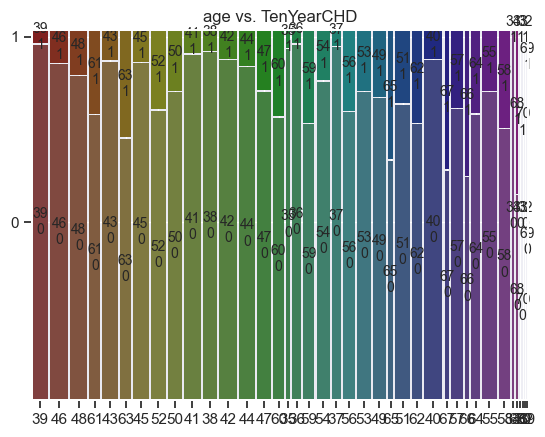

<Figure size 640x480 with 0 Axes>

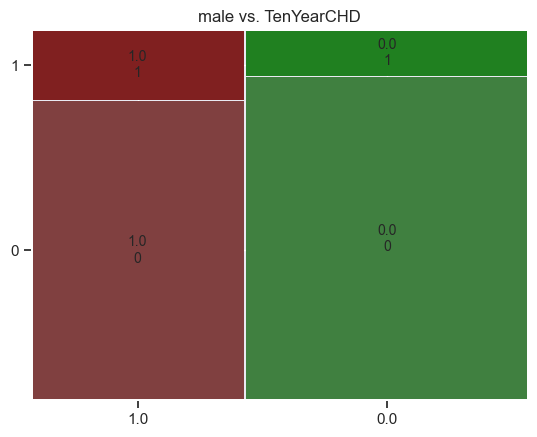

<Figure size 640x480 with 0 Axes>

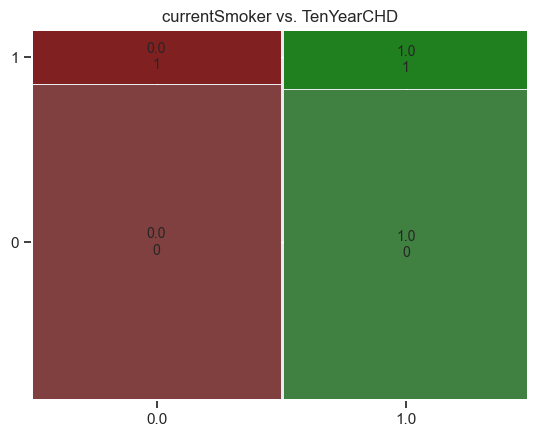

<Figure size 640x480 with 0 Axes>

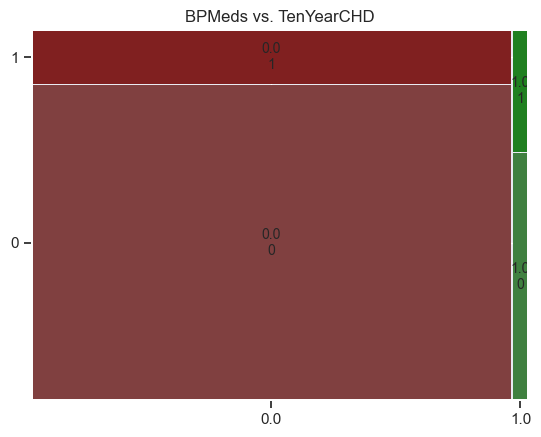

<Figure size 640x480 with 0 Axes>

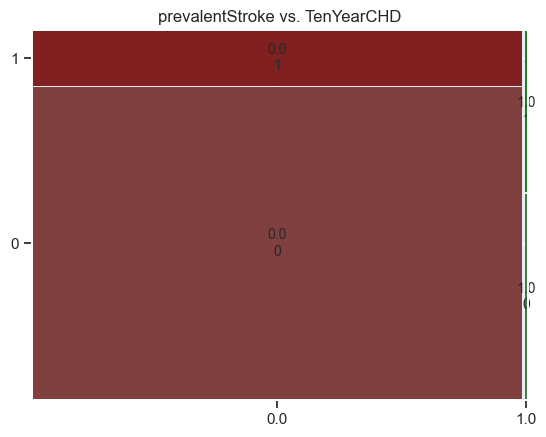

<Figure size 640x480 with 0 Axes>

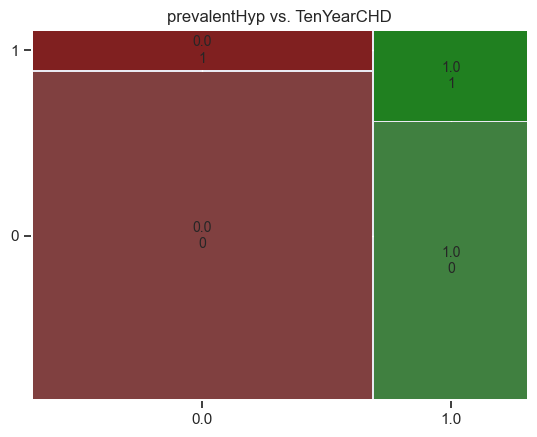

<Figure size 640x480 with 0 Axes>

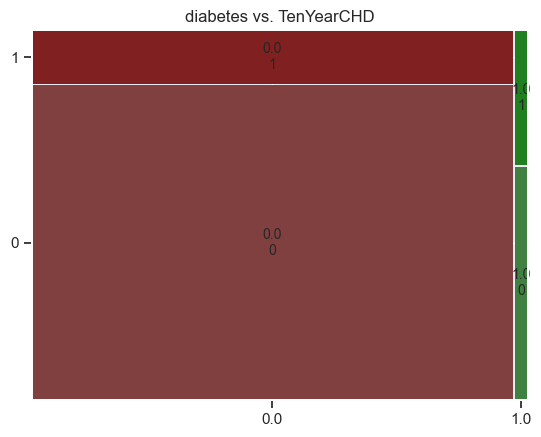

In [45]:
plt.clf()
mosaic(heart_df,['age','TenYearCHD'],gap=0.005, title='age vs. TenYearCHD')
plt.show()

plt.clf()
mosaic(heart_df,['male','TenYearCHD'],gap=0.005, title='male vs. TenYearCHD')
plt.show()

plt.clf()
mosaic(heart_df,['currentSmoker','TenYearCHD'],gap=0.005, title='currentSmoker vs. TenYearCHD')
plt.show()

plt.clf()
mosaic(heart_df,['BPMeds','TenYearCHD'],gap=0.005, title='BPMeds vs. TenYearCHD')
plt.show()

plt.clf()
mosaic(heart_df,['prevalentStroke','TenYearCHD'],gap=0.005, title='prevalentStroke vs. TenYearCHD')
plt.show()

plt.clf()
mosaic(heart_df,['prevalentHyp','TenYearCHD'],gap=0.005, title='prevalentHyp vs. TenYearCHD')
plt.show()

plt.clf()
mosaic(heart_df,['diabetes','TenYearCHD'],gap=0.005, title='diabetes vs. TenYearCHD')
plt.show()


<Figure size 640x480 with 0 Axes>

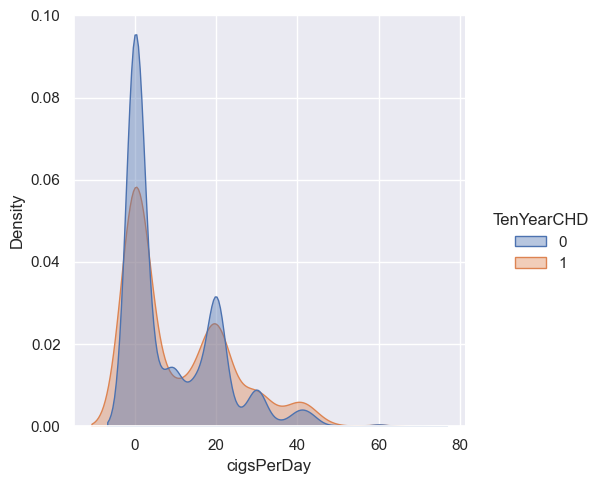

In [46]:
plt.clf()
sns.displot(heart_df, x="cigsPerDay", hue="TenYearCHD",kind="kde",fill=True, common_norm=False, alpha=0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

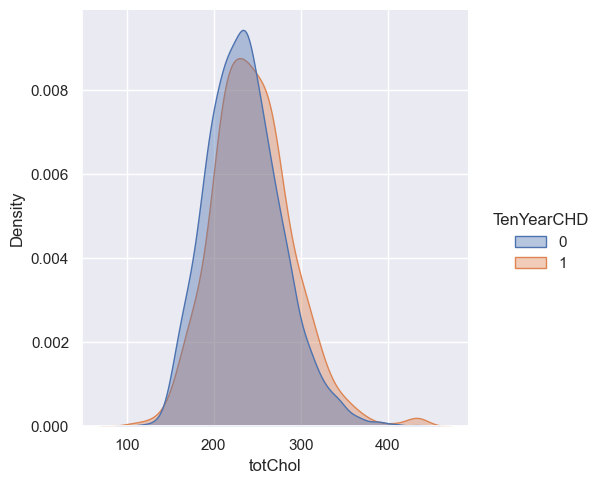

In [47]:
plt.clf()
sns.displot(heart_df, x="totChol", hue="TenYearCHD",kind="kde",fill=True, common_norm=False, alpha=0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

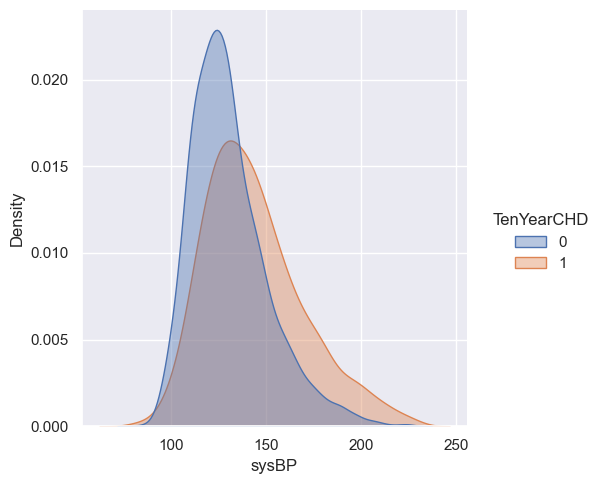

In [48]:
plt.clf()
sns.displot(heart_df, x="sysBP", hue="TenYearCHD",kind="kde",fill=True, common_norm=False, alpha=0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

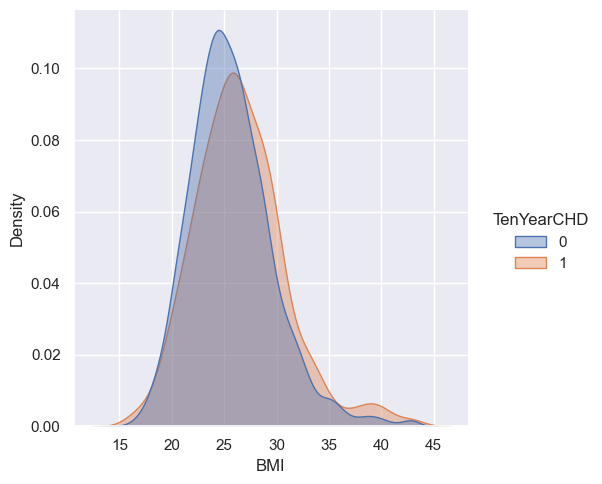

In [49]:
plt.clf()
sns.displot(heart_df, x="BMI", hue="TenYearCHD",kind="kde",fill=True, common_norm=False, alpha=0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

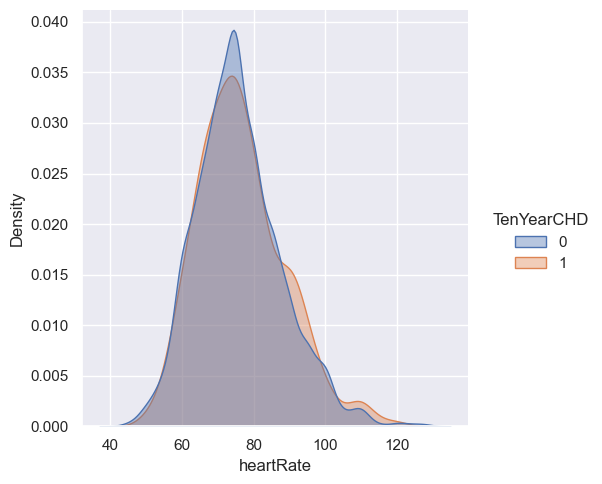

In [50]:
plt.clf()
sns.displot(heart_df, x="heartRate", hue="TenYearCHD",kind="kde",fill=True, common_norm=False, alpha=0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

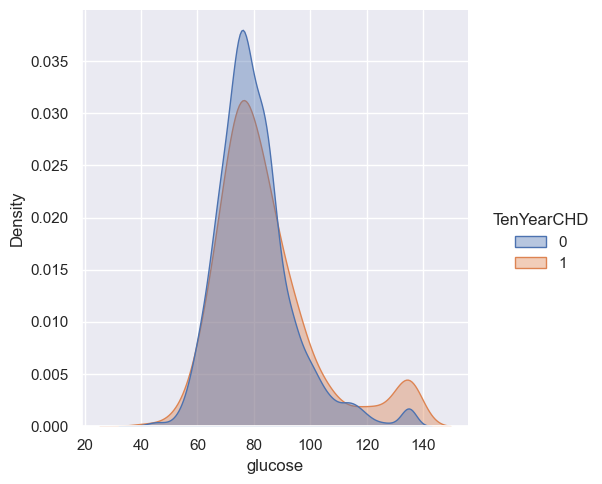

In [51]:
plt.clf()
sns.displot(heart_df, x="glucose", hue="TenYearCHD",kind="kde",fill=True, common_norm=False, alpha=0.4)
plt.show()

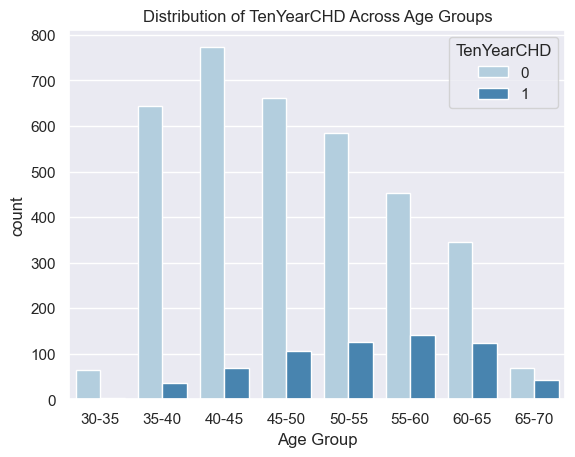

In [52]:
# Create age bins (5-year intervals)
heart_df['age_bins'] = pd.cut(heart_df['age'], bins=[30,35,40,45,50,55,60,65,70], labels=["30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70"])

sns.countplot(x='age_bins', hue='TenYearCHD', data=heart_df, palette='Blues')
plt.title('Distribution of TenYearCHD Across Age Groups')
plt.xlabel('Age Group')
plt.show()

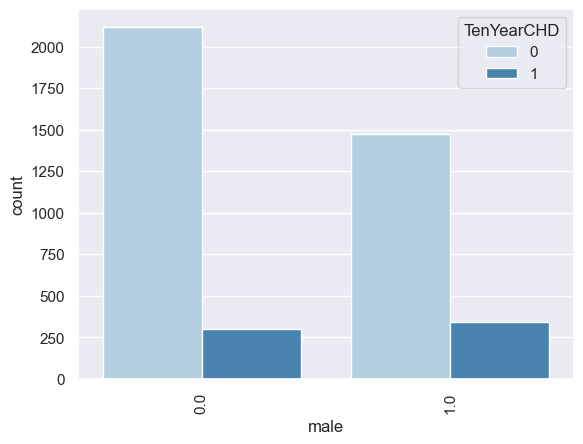

In [53]:
sns.countplot(x='male', hue='TenYearCHD', data=heart_df, palette='Blues')
plt.xticks(rotation=90)  
plt.show()

<Axes: xlabel='prevalentHyp', ylabel='count'>

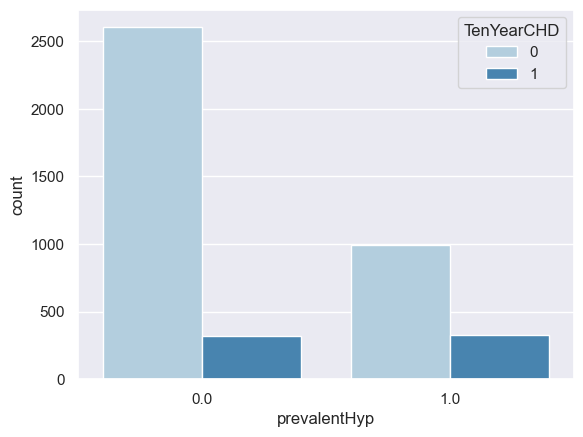

In [54]:
sns.countplot(x='prevalentHyp', hue='TenYearCHD', data=heart_df, palette='Blues')

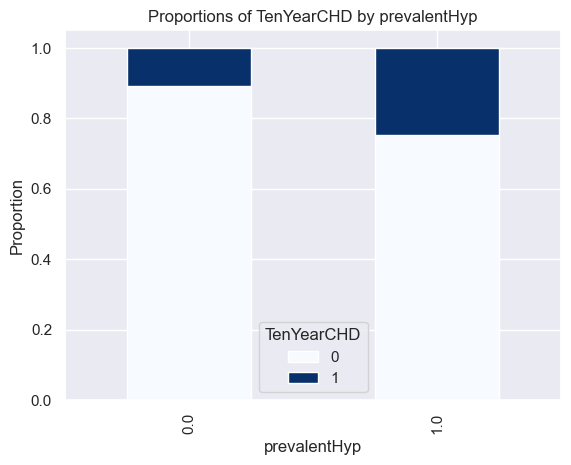

In [55]:
contingency_table = pd.crosstab(heart_df['prevalentHyp'], heart_df['TenYearCHD'])
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

proportions.plot(kind='bar', stacked=True, colormap='Blues')
plt.xlabel('prevalentHyp')
plt.ylabel('Proportion')
plt.title('Proportions of TenYearCHD by prevalentHyp')
plt.legend(title='TenYearCHD')
plt.show()


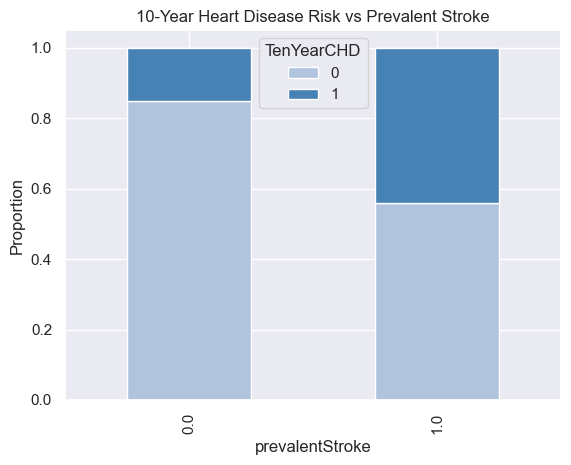

In [56]:
contingency_table = pd.crosstab(heart_df['prevalentStroke'], heart_df['TenYearCHD'])
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

proportions.plot(kind='bar', stacked=True, color=['#B0C4DE', '#4682B4'])  

plt.xlabel('prevalentStroke')
plt.ylabel('Proportion')
plt.title('10-Year Heart Disease Risk vs Prevalent Stroke')
plt.legend(title='TenYearCHD', loc='upper center')
plt.show()


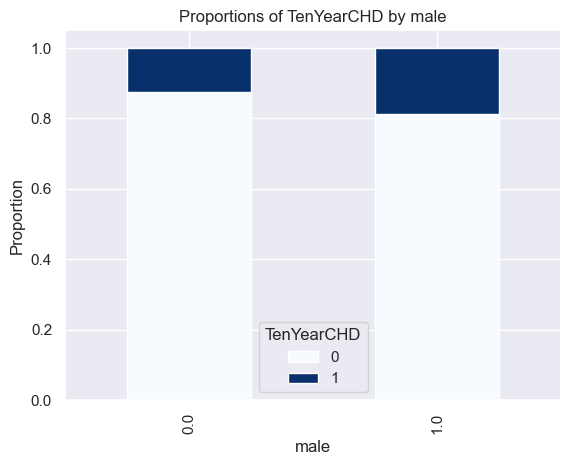

In [57]:
contingency_table = pd.crosstab(heart_df['male'], heart_df['TenYearCHD'])
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

proportions.plot(kind='bar', stacked=True, colormap='Blues')
plt.xlabel('male')
plt.ylabel('Proportion')
plt.title('Proportions of TenYearCHD by male')
plt.legend(title='TenYearCHD')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16276\2629471711.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




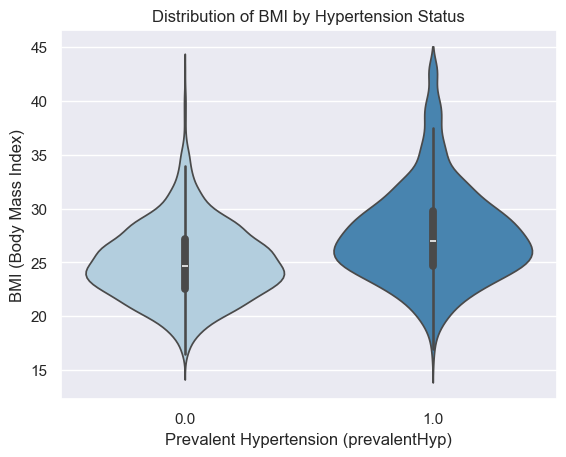

In [58]:
sns.violinplot(data=heart_df, x='prevalentHyp', y='BMI', palette='Blues')
plt.xlabel('Prevalent Hypertension (prevalentHyp)')
plt.ylabel('BMI (Body Mass Index)')
plt.title('Distribution of BMI by Hypertension Status')
plt.show()

<Axes: xlabel='male', ylabel='count'>

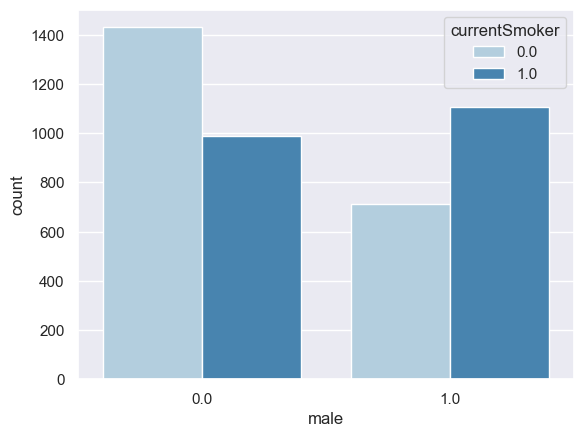

In [61]:
sns.countplot(x='male', hue='currentSmoker', data=heart_df, palette='Blues')

## Transformations

In [62]:
transf_cramer = imputDep.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,varObjBin, tipo='cramer'))
transf_cramer_names = imputDep.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,varObjBin,tipo='cramer', name=True))
transf_cramer.columns = transf_cramer_names.values
transf_cramer


age_sqr  cigsPerDay_raiz4  totChol_sqr  sysBP_ident  diaBP_sqr  \
0      0.667151          0.100000     4.064802     1.029838   3.423641   
1      2.668279          0.100000    10.733209     1.716330   7.702916   
2      3.485046          1.138909     9.995779     2.013809   7.243162   
3     11.448369          1.260403     7.308481     3.043547  15.624771   
4      2.668279          1.179404    16.630002     2.128225   9.167051   
...         ...               ...          ...          ...        ...   
4233   4.410708          0.538709    22.273263     4.370764  13.693825   
4234   4.914376          1.379098     5.248907     1.968043   7.243162   
4235   3.485046          1.138909    10.435088     2.173991   4.074379   
4236   1.960408          1.059879     5.568552     1.968043  10.758498   
4237   5.445267          0.100000    13.774772     2.288406   8.664860   

        BMI_sqr  heartRate_exp  glucose_exp  aleatorio_exp  aleatorio2_cuarta  
0      8.047473      20.135885    13.250636       5.960698       2.577122e+01  
1     10.716490      70.351564    12.356833       8.575670       5.539457e-01  
2      5.915947      13.269963     8.126993       1.857434       8.690673e-01  
3     10.474142       5.763253    81.433858       7.750414       1.263754e+01  
4      3.520678      30.554257    23.167178       5.003188       2.978963e+01  
...         ...            ...          ...            ...                ...  
4233   6.700984       6.264521    24.842922       1.091901       1.138250e+02  
4234   1.071254       5.763253     7.067581       1.984796       1.016370e-01  
4235   2.570725      28.109397    24.842922       1.147875       1.998516e+01  
4236   0.807328      33.211763    19.683584       2.039790       1.879064e-08  
4237   2.166231      20.135885   107.677065       3.897357       6.826691e+01  

[4238 rows x 10 columns]

In [63]:
imput_transf = imputDep.join(transf_cramer)
tablaCramer = pd.DataFrame(imput_transf.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])

px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a TenYearCHD').update_yaxes(categoryorder="total ascending").show()
plt.show()

In [64]:
todo_bin = pd.concat([imput_transf,varObjBin], axis=1)
todo_bin.to_csv('todo_bin_Heart.csv')

## 4. Logistic Regression Models

We will work with the file containing the original variables.









In [65]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 4237
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              4238 non-null   int32   
 1   cigsPerDay       4238 non-null   float64 
 2   totChol          4238 non-null   float64 
 3   sysBP            4238 non-null   float64 
 4   diaBP            4238 non-null   float64 
 5   BMI              4238 non-null   float64 
 6   heartRate        4238 non-null   float64 
 7   glucose          4238 non-null   float64 
 8   prop_missings    4238 non-null   category
 9   male             4238 non-null   category
 10  currentSmoker    4238 non-null   category
 11  BPMeds           4238 non-null   category
 12  prevalentStroke  4238 non-null   category
 13  prevalentHyp     4238 non-null   category
 14  diabetes         4238 non-null   category
 15  TenYearCHD       4238 non-null   category
 16  aleatorio        4238 non-null   float64 
 17  

In [66]:
heart_df.describe()

age   cigsPerDay      totChol        sysBP        diaBP  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean     49.584946     9.003775   236.622306   132.316541    82.889335   
std       8.572160    11.889170    43.655176    21.852803    11.891955   
min      32.000000     0.000000   107.000000    83.500000    48.000000   
25%      42.000000     0.000000   206.000000   117.000000    75.000000   
50%      49.000000     0.000000   234.000000   128.000000    82.000000   
75%      56.000000    20.000000   263.000000   144.000000    89.875000   
max      70.000000    70.000000   434.000000   225.000000   134.500000   

               BMI    heartRate      glucose    aleatorio   aleatorio2  
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000  
mean     25.791549    75.872267    80.632295     0.501720     0.497900  
std       4.029796    11.991808    14.320877     0.289463     0.288995  
min      15.540000    44.000000    40.000000     0.000019     0.000172  
25%      23.070000    68.000000    72.000000     0.250538     0.246801  
50%      25.385000    75.000000    78.000000     0.503902     0.497550  
75%      28.040000    83.000000    87.000000     0.752351     0.755115  
max      42.950000   128.000000   135.000000     0.999978     0.999667

### Training-test Partition

In [67]:
X_train, X_test, y_train, y_test = train_test_split(imputDep, varObjBin, test_size=0.2, random_state=1234)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)


Training dataset shape: (3390, 17) (3390,)
Testing dataset shape: (848, 17) (848,)


In [68]:
print(y_train.value_counts(normalize=True))
y_test.value_counts(normalize=True)


TenYearCHD
0    0.847198
1    0.152802
Name: proportion, dtype: float64


TenYearCHD
0    0.851415
1    0.148585
Name: proportion, dtype: float64

## Full Reference Model

We start with our full reference model that includes all the variables.

A word of caution at this stage: the logit method from statsmodels.formula.api does not accept a categorical variable as the target, so we will transform it into an integer.

In [69]:
data_train = X_train.join(y_train.astype('int64'))

In [70]:
formC=ols_formula(data_train,'TenYearCHD')
formC

'TenYearCHD ~ age + cigsPerDay + totChol + sysBP + diaBP + BMI + heartRate + glucose + prop_missings + male + currentSmoker + BPMeds + prevalentStroke + prevalentHyp + diabetes + aleatorio + aleatorio2'

In [71]:
data_train = X_train.join(y_train.astype('int64'))
data_test = X_test.join(y_test.astype('int64'))

y_tr, X_tr = patsy.dmatrices(formC, data_train, return_type='dataframe')
y_tst, X_tst = patsy.dmatrices(formC, data_test, return_type='dataframe')

Once again, we will work with the formula interface, which is convenient. As always, we create a function that concatenates all the effects in the dataset into a single formula, saving us from writing too much.

In [72]:
data_train

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1700   35         0.0    170.0  110.0   69.0  23.48       75.0     83.0   
2075   37        20.0    166.0  112.0   73.5  21.64       75.0     93.0   
4146   42         0.0    235.0  103.0   70.0  21.48       67.0     73.0   
2571   39        15.0    226.0  115.0   80.0  25.19       72.0     74.0   
4153   41        15.0    239.0  101.0   69.0  26.95       80.0     89.0   
...   ...         ...      ...    ...    ...    ...        ...      ...   
664    62         0.0    300.0  205.5  104.5  32.19       94.0    117.0   
3276   61        20.0    260.0  115.0   79.0  23.65       56.0     78.0   
1318   50        40.0    238.0  127.5   85.0  27.82       80.0     69.0   
723    51         0.0    283.0  152.0   99.0  31.63       62.0     73.0   
2863   43         0.0    194.0  122.5   82.0  35.16       75.0     80.0   

     prop_missings male currentSmoker BPMeds prevalentStroke prevalentHyp  \
1700      0.000000  0.0           0.0    0.0             0.0          0.0   
2075      0.000000  0.0           1.0    0.0             0.0          0.0   
4146      0.000000  1.0           0.0    0.0             0.0          0.0   
2571      0.000000  0.0           1.0    0.0             0.0          0.0   
4153      7.692308  1.0           1.0    0.0             0.0          0.0   
...            ...  ...           ...    ...             ...          ...   
664       0.000000  0.0           0.0    0.0             0.0          1.0   
3276      0.000000  1.0           1.0    0.0             0.0          0.0   
1318      0.000000  1.0           1.0    0.0             0.0          0.0   
723       0.000000  0.0           0.0    1.0             0.0          1.0   
2863      0.000000  0.0           0.0    0.0             0.0          0.0   

     diabetes  aleatorio  aleatorio2  TenYearCHD  
1700      0.0   0.052886    0.909220           0  
2075      0.0   0.706880    0.598733           1  
4146      0.0   0.330543    0.344853           0  
2571      0.0   0.115471    0.397291           0  
4153      0.0   0.472724    0.982358           0  
...       ...        ...         ...         ...  
664       0.0   0.074088    0.841527           0  
3276      0.0   0.837314    0.673001           0  
1318      0.0   0.893058    0.526909           0  
723       0.0   0.511012    0.365252           0  
2863      0.0   0.865870    0.015311           0  

[3390 rows x 18 columns]

In [73]:
modeloCompleto = logit(formC, data=data_train).fit(maxiter=1000)
modeloCompleto.summary()

         Current function value: 0.379297
         Iterations: 1000


C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3370
Method:                           MLE   Df Model:                           19
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1128
Time:                        11:34:48   Log-Likelihood:                -1285.8
converged:                      False   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 5.454e-58
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -8.6013      0.763    -11.266      0.000     -10.098      -7.105
prop_missings[T.7.6923076923076925]    -0.2004      0.179     -1.120      0.263      -0.551       0.150
prop_missings[T.16.666666666666664]     0.3801      0.437      0.869      0.385      -0.477       1.237
prop_missings[T.27.27272727272727]    -19.4372   2.69e+04     -0.001      0.999   -5.28e+04    5.27e+04
male[T.1.0]                             0.5610      0.113      4.974      0.000       0.340       0.782
currentSmoker[T.1.0]                    0.1358      0.160      0.852      0.394      -0.177       0.449
BPMeds[T.1.0]                           0.0047      0.255      0.018      0.985      -0.496       0.505
prevalentStroke[T.1.0]                  0.9986      0.516      1.934      0.053      -0.014       2.011
prevalentHyp[T.1.0]                     0.1058      0.144      0.732      0.464      -0.177       0.389
diabetes[T.1.0]                         0.4610      0.285      1.620      0.105      -0.097       1.019
age                                     0.0626      0.007      9.035      0.000       0.049       0.076
cigsPerDay                              0.0161      0.006      2.537      0.011       0.004       0.029
totChol                                 0.0017      0.001      1.401      0.161      -0.001       0.004
sysBP                                   0.0183      0.004      4.513      0.000       0.010       0.026
diaBP                                  -0.0042      0.007     -0.632      0.528      -0.017       0.009
BMI                                     0.0046      0.013      0.343      0.732      -0.022       0.031
heartRate                               0.0007      0.004      0.155      0.876      -0.008       0.009
glucose                                 0.0040      0.004      1.083      0.279      -0.003       0.011
aleatorio                               0.1222      0.173      0.705      0.481      -0.217       0.462
aleatorio2                              0.0092      0.177      0.052      0.959      -0.337       0.355
=======================================================================================================
"""

         Current function value: 0.379297
         Iterations: 1000


C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



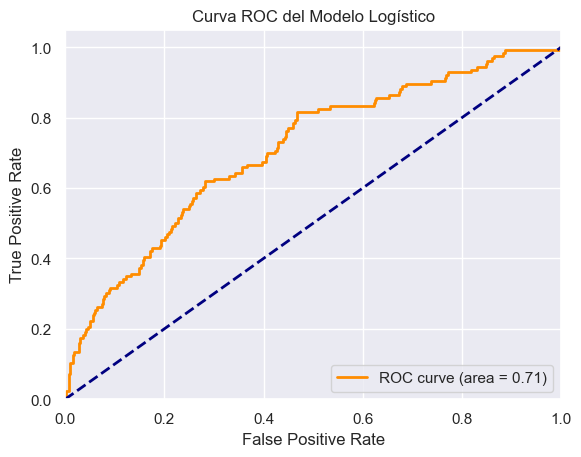

In [74]:
# Create and adjust the model 
modeloCompleto = logit('TenYearCHD ~ age + cigsPerDay + totChol + sysBP + diaBP + BMI + heartRate + glucose + prop_missings + male + currentSmoker + BPMeds + prevalentStroke + prevalentHyp + diabetes + aleatorio + aleatorio2', data=data_train).fit(maxiter=1000)
# Make predictions on the test set
y_pred_prob = modeloCompleto.predict(data_test)

y_test = data_test['TenYearCHD']

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del Modelo Logístico')
plt.legend(loc="lower right")
plt.show()

PseudoR2 is 0.11 and the ROC curve is slightly over 0.70, let's try a model eliminating those variables with a high correlation

In [75]:
form1 = 'TenYearCHD ~ age + cigsPerDay + totChol + sysBP + BMI + heartRate + prop_missings + male + BPMeds + prevalentStroke + diabetes'

# Adjust model 1
modelo1 = logit(form1,data=data_train).fit(maxiter=10000)
modelo1.summary()

Optimization terminated successfully.
         Current function value: 0.379787
         Iterations 2734


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3376
Method:                           MLE   Df Model:                           13
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1117
Time:                        11:34:51   Log-Likelihood:                -1287.5
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 2.524e-61
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -8.5159      0.618    -13.785      0.000      -9.727      -7.305
prop_missings[T.7.6923076923076925]    -0.1857      0.178     -1.042      0.298      -0.535       0.164
prop_missings[T.16.666666666666664]     0.3992      0.436      0.915      0.360      -0.456       1.255
prop_missings[T.27.27272727272727]    -59.6178   1.51e+13  -3.96e-12      1.000   -2.95e+13    2.95e+13
male[T.1.0]                             0.5545      0.112      4.969      0.000       0.336       0.773
BPMeds[T.1.0]                           0.0142      0.255      0.056      0.956      -0.485       0.513
prevalentStroke[T.1.0]                  1.0395      0.513      2.025      0.043       0.034       2.046
diabetes[T.1.0]                         0.6241      0.247      2.530      0.011       0.141       1.108
age                                     0.0637      0.007      9.494      0.000       0.051       0.077
cigsPerDay                              0.0197      0.004      4.559      0.000       0.011       0.028
totChol                                 0.0017      0.001      1.387      0.166      -0.001       0.004
sysBP                                   0.0181      0.002      7.361      0.000       0.013       0.023
BMI                                     0.0027      0.013      0.209      0.835      -0.023       0.028
heartRate                               0.0013      0.004      0.304      0.761      -0.007       0.010
=======================================================================================================
"""

In [76]:
form2 = 'TenYearCHD ~ age + cigsPerDay + totChol + sysBP + BMI + heartRate + male + BPMeds + prevalentStroke + diabetes'

# Adjust model 2
modelo2 = logit(form2,data=data_train).fit(maxiter=10000)
modelo2.summary()

Optimization terminated successfully.
         Current function value: 0.380171
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3379
Method:                           MLE   Df Model:                           10
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1108
Time:                        11:34:51   Log-Likelihood:                -1288.8
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 5.193e-63
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8.5231      0.617    -13.814      0.000      -9.732      -7.314
male[T.1.0]                0.5535      0.111      4.999      0.000       0.336       0.771
BPMeds[T.1.0]              0.0268      0.254      0.105      0.916      -0.471       0.525
prevalentStroke[T.1.0]     1.0248      0.514      1.995      0.046       0.018       2.031
diabetes[T.1.0]            0.6378      0.247      2.586      0.010       0.154       1.121
age                        0.0636      0.007      9.491      0.000       0.050       0.077
cigsPerDay                 0.0200      0.004      4.616      0.000       0.011       0.028
totChol                    0.0017      0.001      1.430      0.153      -0.001       0.004
sysBP                      0.0182      0.002      7.403      0.000       0.013       0.023
BMI                        0.0021      0.013      0.163      0.871      -0.023       0.028
heartRate                  0.0011      0.004      0.265      0.791      -0.007       0.010
==========================================================================================
"""

In [77]:
form3 = 'TenYearCHD ~ age + cigsPerDay + sysBP + male + prevalentStroke + diabetes'

# Adjust model 3
modelo3 = logit(form3,data=data_train).fit(maxiter=10000)
modelo3.summary()

Optimization terminated successfully.
         Current function value: 0.380498
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3383
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1100
Time:                        11:34:51   Log-Likelihood:                -1289.9
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 7.121e-66
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8.0839      0.420    -19.227      0.000      -8.908      -7.260
male[T.1.0]                0.5275      0.108      4.876      0.000       0.315       0.740
prevalentStroke[T.1.0]     1.0235      0.511      2.004      0.045       0.023       2.024
diabetes[T.1.0]            0.6378      0.245      2.604      0.009       0.158       1.118
age                        0.0645      0.007      9.748      0.000       0.052       0.078
cigsPerDay                 0.0202      0.004      4.731      0.000       0.012       0.029
sysBP                      0.0188      0.002      8.286      0.000       0.014       0.023
==========================================================================================
"""

In [78]:
form4 = 'TenYearCHD ~ age*cigsPerDay + sysBP + male + prevalentStroke + diabetes'

# Adjust model 4
modelo4 = logit(form4,data=data_train).fit(maxiter=10000)
modelo4.summary()

Optimization terminated successfully.
         Current function value: 0.380368
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1103
Time:                        11:34:52   Log-Likelihood:                -1289.4
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 3.521e-65
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7.8467      0.488    -16.078      0.000      -8.803      -6.890
male[T.1.0]                0.5229      0.108      4.832      0.000       0.311       0.735
prevalentStroke[T.1.0]     1.0213      0.510      2.001      0.045       0.021       2.022
diabetes[T.1.0]            0.6414      0.245      2.619      0.009       0.161       1.121
age                        0.0600      0.008      7.345      0.000       0.044       0.076
cigsPerDay                -0.0039      0.026     -0.147      0.883      -0.055       0.047
age:cigsPerDay             0.0005      0.001      0.932      0.351      -0.001       0.001
sysBP                      0.0189      0.002      8.307      0.000       0.014       0.023
==========================================================================================
"""

In [79]:
form5 = 'TenYearCHD ~ age*sysBP + cigsPerDay + male + prevalentStroke + diabetes'

# Adjust model 5
modelo5 = logit(form5,data=data_train).fit(maxiter=10000)
modelo5.summary()

Optimization terminated successfully.
         Current function value: 0.380071
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1110
Time:                        11:34:52   Log-Likelihood:                -1288.4
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 1.306e-65
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -11.5828      2.108     -5.494      0.000     -15.715      -7.451
male[T.1.0]                0.5090      0.108      4.692      0.000       0.296       0.722
prevalentStroke[T.1.0]     1.0466      0.510      2.052      0.040       0.047       2.046
diabetes[T.1.0]            0.6424      0.243      2.640      0.008       0.166       1.119
age                        0.1288      0.038      3.350      0.001       0.053       0.204
sysBP                      0.0447      0.015      2.906      0.004       0.015       0.075
age:sysBP                 -0.0005      0.000     -1.702      0.089      -0.001    7.14e-05
cigsPerDay                 0.0202      0.004      4.740      0.000       0.012       0.029
==========================================================================================
"""

In [80]:
form6 = 'TenYearCHD ~ age + sysBP*cigsPerDay + male + prevalentStroke + diabetes'

# Adjust model 6
modelo6 = logit(form6,data=data_train).fit(maxiter=10000)
modelo6.summary()

Optimization terminated successfully.
         Current function value: 0.380492
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1100
Time:                        11:34:52   Log-Likelihood:                -1289.9
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 5.319e-65
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8.0379      0.477    -16.863      0.000      -8.972      -7.104
male[T.1.0]                0.5265      0.108      4.864      0.000       0.314       0.739
prevalentStroke[T.1.0]     1.0230      0.511      2.004      0.045       0.022       2.024
diabetes[T.1.0]            0.6403      0.245      2.612      0.009       0.160       1.121
age                        0.0646      0.007      9.750      0.000       0.052       0.078
sysBP                      0.0185      0.003      6.639      0.000       0.013       0.024
cigsPerDay                 0.0152      0.025      0.609      0.543      -0.034       0.064
sysBP:cigsPerDay        3.653e-05      0.000      0.204      0.838      -0.000       0.000
==========================================================================================
"""

In [81]:
form7 = 'TenYearCHD ~ age * cigsPerDay + age * sysBP + cigsPerDay * sysBP + prevalentStroke + male + sysBP + diabetes'

# Adjust model 7
modelo7 = logit(form7,data=data_train).fit(maxiter=10000)
modelo7.summary()

Optimization terminated successfully.
         Current function value: 0.379954
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3380
Method:                           MLE   Df Model:                            9
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1113
Time:                        11:34:52   Log-Likelihood:                -1288.0
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 4.104e-64
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -11.5137      2.256     -5.105      0.000     -15.934      -7.093
prevalentStroke[T.1.0]     1.0459      0.510      2.052      0.040       0.047       2.045
male[T.1.0]                0.5063      0.109      4.664      0.000       0.294       0.719
diabetes[T.1.0]            0.6407      0.244      2.629      0.009       0.163       1.118
age                        0.1256      0.040      3.127      0.002       0.047       0.204
cigsPerDay                 0.0085      0.033      0.255      0.799      -0.057       0.074
age:cigsPerDay             0.0004      0.001      0.853      0.393      -0.001       0.001
sysBP                      0.0459      0.016      2.812      0.005       0.014       0.078
age:sysBP                 -0.0005      0.000     -1.676      0.094      -0.001    8.11e-05
cigsPerDay:sysBP       -7.929e-05      0.000     -0.420      0.675      -0.000       0.000
==========================================================================================
"""

In [82]:
form8 = 'TenYearCHD ~ age*prevalentStroke + sysBP + cigsPerDay + male + diabetes'

# Adjust model 8
modelo8 = logit(form8,data=data_train).fit(maxiter=10000)
modelo8.summary()

Optimization terminated successfully.
         Current function value: 0.379977
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1112
Time:                        11:34:52   Log-Likelihood:                -1288.1
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 9.528e-66
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -8.0328      0.421    -19.072      0.000      -8.858      -7.207
prevalentStroke[T.1.0]       -10.8510      7.874     -1.378      0.168     -26.283       4.581
male[T.1.0]                    0.5287      0.108      4.882      0.000       0.316       0.741
diabetes[T.1.0]                0.6407      0.245      2.617      0.009       0.161       1.121
age                            0.0637      0.007      9.603      0.000       0.051       0.077
age:prevalentStroke[T.1.0]     0.2050      0.134      1.525      0.127      -0.058       0.468
sysBP                          0.0188      0.002      8.260      0.000       0.014       0.023
cigsPerDay                     0.0201      0.004      4.698      0.000       0.012       0.028
==============================================================================================
"""

In [83]:
form9 = 'TenYearCHD ~ age + cigsPerDay + totChol + sysBP + diaBP + BMI + heartRate + glucose + male + currentSmoker + BPMeds + prevalentStroke + prevalentHyp + diabetes'

# Adjust model 9
modelo9 = logit(form9,data=data_train).fit(maxiter=10000)
modelo9.summary()

Optimization terminated successfully.
         Current function value: 0.379776
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3375
Method:                           MLE   Df Model:                           14
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1117
Time:                        11:34:53   Log-Likelihood:                -1287.4
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 1.245e-60
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8.5370      0.750    -11.389      0.000     -10.006      -7.068
male[T.1.0]                0.5616      0.112      5.019      0.000       0.342       0.781
currentSmoker[T.1.0]       0.1368      0.159      0.861      0.389      -0.175       0.448
BPMeds[T.1.0]              0.0135      0.254      0.053      0.958      -0.485       0.512
prevalentStroke[T.1.0]     0.9928      0.516      1.925      0.054      -0.018       2.003
prevalentHyp[T.1.0]        0.1089      0.144      0.757      0.449      -0.173       0.391
diabetes[T.1.0]            0.4872      0.284      1.713      0.087      -0.070       1.044
age                        0.0625      0.007      9.022      0.000       0.049       0.076
cigsPerDay                 0.0162      0.006      2.559      0.011       0.004       0.029
totChol                    0.0017      0.001      1.442      0.149      -0.001       0.004
sysBP                      0.0183      0.004      4.499      0.000       0.010       0.026
diaBP                     -0.0038      0.007     -0.568      0.570      -0.017       0.009
BMI                        0.0036      0.013      0.270      0.787      -0.022       0.030
heartRate                  0.0005      0.004      0.124      0.901      -0.008       0.009
glucose                    0.0039      0.004      1.047      0.295      -0.003       0.011
==========================================================================================
"""

In [84]:
# Change target variable into numerical
heart_df.Compra = heart_df.TenYearCHD.astype('int64')

# Apply one of the formulas
cross_val_log(form3,data=heart_df)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16276\116535246.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\Usuario\Portfolio\Logistic Regression Diabetes\NuestrasFunciones.py:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: TenYearCHD ~ age + cigsPerDay + sysBP + male + prevalentStroke + diabetes
AUC: 0.727 (0.020)


array([0.73393167, 0.72038064, 0.76316315, 0.71770303, 0.69723458,
       0.71518366, 0.71771309, 0.75887137, 0.72510803, 0.72539016,
       0.73555541, 0.7203573 , 0.72505776, 0.70636787, 0.75368827,
       0.72537206, 0.69675757, 0.74462181, 0.71889819, 0.749057  ,
       0.72068575, 0.73248622, 0.73247264, 0.72604953, 0.72309949,
       0.68610444, 0.72209682, 0.73399614, 0.73948304, 0.752268  ,
       0.69808526, 0.73982104, 0.74577342, 0.728392  , 0.72175744,
       0.6977014 , 0.73946379, 0.7436354 , 0.71307906, 0.74380734,
       0.75815763, 0.73987591, 0.70290256, 0.71829679, 0.71887927,
       0.72637145, 0.70740223, 0.71405161, 0.75559073, 0.73360062,
       0.70245092, 0.75080198, 0.76081343, 0.69475266, 0.71992652,
       0.73450622, 0.75208296, 0.71552647, 0.72567056, 0.71249242,
       0.73281872, 0.72194561, 0.77294201, 0.66102551, 0.74020599,
       0.72244162, 0.73353889, 0.68834456, 0.74568889, 0.74618909,
       0.75495989, 0.71697022, 0.74897527, 0.7038837 , 0.70856

In [85]:
#### Create formula list
list_form = [formC,form1,form2,form3,form4,form5,form6,form7]

model = LogisticRegression(max_iter=10000) 
list_res = pd.DataFrame(map(lambda x: cross_val_log(x,heart_df, seed=2022),list_form))

C:\Users\Usuario\Portfolio\Logistic Regression Diabetes\NuestrasFunciones.py:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

Modelo: TenYearCHD ~ age + cigsPerDay + totChol + sysBP + diaBP + BMI + heartRate + glucose + prop_missings + male + currentSmoker + BPMeds + prevalentStroke + prevalentHyp + diabetes + aleatorio + aleatorio2
AUC: 0.724 (0.021)


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\Lib\site-pa

Modelo: TenYearCHD ~ age + cigsPerDay + totChol + sysBP + BMI + heartRate + prop_missings + male + BPMeds + prevalentStroke + diabetes
AUC: 0.727 (0.021)


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\Lib\site-pa

Modelo: TenYearCHD ~ age + cigsPerDay + totChol + sysBP + BMI + heartRate + male + BPMeds + prevalentStroke + diabetes
AUC: 0.726 (0.021)


C:\Users\Usuario\Portfolio\Logistic Regression Diabetes\NuestrasFunciones.py:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: TenYearCHD ~ age + cigsPerDay + sysBP + male + prevalentStroke + diabetes
AUC: 0.727 (0.021)


C:\Users\Usuario\Portfolio\Logistic Regression Diabetes\NuestrasFunciones.py:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: TenYearCHD ~ age*cigsPerDay + sysBP + male + prevalentStroke + diabetes
AUC: 0.727 (0.021)


C:\Users\Usuario\Portfolio\Logistic Regression Diabetes\NuestrasFunciones.py:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

Modelo: TenYearCHD ~ age*sysBP + cigsPerDay + male + prevalentStroke + diabetes
AUC: 0.727 (0.021)


C:\Users\Usuario\Portfolio\Logistic Regression Diabetes\NuestrasFunciones.py:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: TenYearCHD ~ age + sysBP*cigsPerDay + male + prevalentStroke + diabetes
AUC: 0.727 (0.021)


C:\Users\Usuario\Portfolio\Logistic Regression Diabetes\NuestrasFunciones.py:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

Modelo: TenYearCHD ~ age * cigsPerDay + age * sysBP + cigsPerDay * sysBP + prevalentStroke + male + sysBP + diabetes
AUC: 0.724 (0.020)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16276\3734025630.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




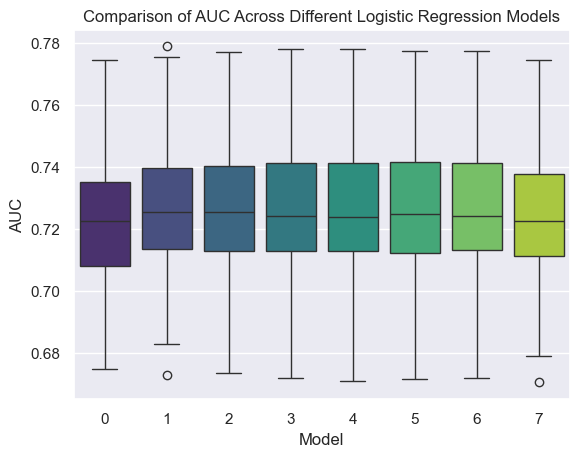

In [86]:
results = list_res.T.melt()
results.columns = ['Model','AUC']
results.head()

# Parallel boxplot to compare
plt.clf()
sns.boxplot(x='Model',y='AUC',data=results,palette='viridis')
plt.title('Comparison of AUC Across Different Logistic Regression Models')  # Adding a title
plt.show()

We keep model 4, as all the variables are significant.

### Optimal cutoff point for the estimated probability.

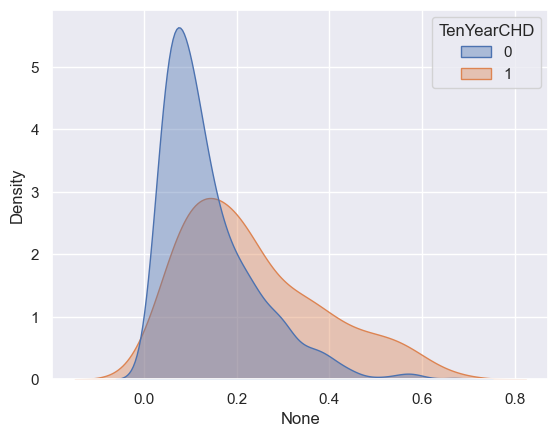

In [87]:
y_pred = modelo3.predict(X_test)
plt.clf()
sns.kdeplot(x=y_pred, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()

In [88]:
y_pred.describe()

count    848.000000
mean       0.153897
std        0.114668
min        0.020468
25%        0.070552
50%        0.117953
75%        0.207788
max        0.670577
dtype: float64

In [89]:
def saca_metricas(y_true, y_pred, y_prob):
    print('matriz de confusión')
    print(confusion_matrix(y_true, y_pred))
    print('accuracy')
    print(accuracy_score(y_true, y_pred))
    print('precision')
    print(precision_score(y_true, y_pred))
    print('recall')
    print(recall_score(y_true, y_pred))
    print('f1')
    print(f1_score(y_true, y_pred))
    
    # Calculate ROC and AUC curves using probabilities
    false_positive_rate, recall, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.show()

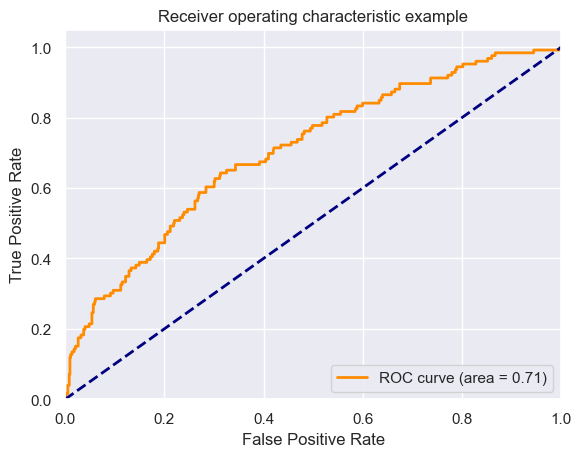

In [90]:
def roc_grafico(test,pred): 
    fpr, tpr, thresholds = metrics.roc_curve(test,pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()
    
roc_grafico(y_test,y_pred)

In [91]:
# Apply Youden's cutoff point (from NuestrasFunciones)
corte = cutoff_youden(y_test,y_pred)
corte

0.15829186317613997

In [92]:
# Let's look at the coefficients of our winning model
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3383
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1100
Time:                        11:36:34   Log-Likelihood:                -1289.9
converged:                       True   LL-Null:                       -1449.4
Covariance Type:            nonrobust   LLR p-value:                 7.121e-66
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8.0839      0.420    -19.227      0.000      -8.908      -7.260
male[T.1.0]                0.5275      0.108      4.876      0.000       0.315       0.740
prevalentStroke[T.1.0]     1.0235      0.511      2.004      0.045       0.023       2.024
diabetes[T.1.0]            0.6378      0.245      2.604      0.009       0.158       1.118
age                        0.0645      0.007      9.748      0.000       0.052       0.078
cigsPerDay                 0.0202      0.004      4.731      0.000       0.012       0.029
sysBP                      0.0188      0.002      8.286      0.000       0.014       0.023
==========================================================================================
"""

All of the p values are under 0.05 which means they are all significant

In [93]:
y_pred = modelo3.predict(X_test)
round(y_pred)

2409    0.0
1121    0.0
2185    0.0
3247    0.0
1848    0.0
       ... 
2376    0.0
3401    0.0
85      0.0
381     0.0
1468    0.0
Length: 848, dtype: float64

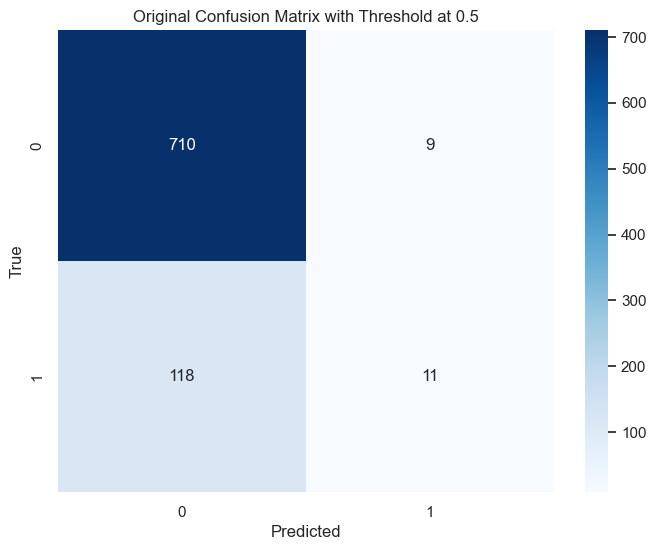

In [154]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Confusion Matrix for the original model
plot_confusion_matrix(y_test, round(y_pred), 'Original Confusion Matrix with Threshold at 0.5')

In [95]:
# Classification Report
print(metrics.classification_report(y_tst,round(y_pred)))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       722
         1.0       0.61      0.09      0.15       126

    accuracy                           0.86       848
   macro avg       0.74      0.54      0.54       848
weighted avg       0.82      0.86      0.81       848



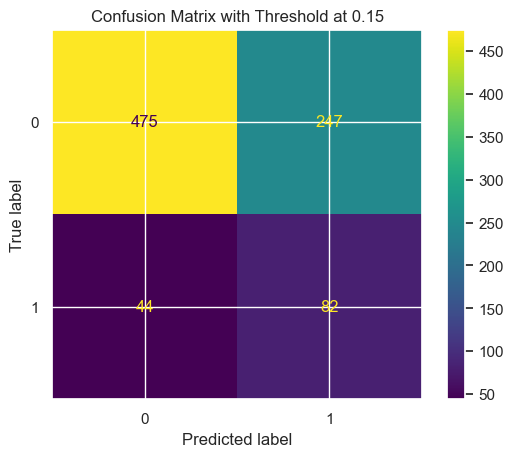

In [96]:
y_pred = modelo3.predict(X_test)
y_clas =  y_pred.map(lambda x: 1 if x > 0.15 else 0)

cm = confusion_matrix(y_test, y_clas)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix with Threshold at 0.15")  # Add the title here
cm_display
plt.show(cm_display)

In [97]:
# Classification Report
print(metrics.classification_report(y_tst,y_clas))

              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77       722
         1.0       0.25      0.65      0.36       126

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.66      0.71       848



In [98]:
varObjBin

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: category
Categories (2, int64): [0, 1]

In [99]:
# We fit the model to the full data to obtain more reliable estimators.
heart_df = pd.concat([imputDep,varObjBin.astype('int64')], axis=1)

modeloF = logit(form3,data=heart_df).fit()
modeloF.summary()

Optimization terminated successfully.
         Current function value: 0.380927
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4231
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1060
Time:                        11:36:35   Log-Likelihood:                -1614.4
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 1.385e-79
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7.9128      0.373    -21.193      0.000      -8.645      -7.181
male[T.1.0]                0.4832      0.097      4.981      0.000       0.293       0.673
prevalentStroke[T.1.0]     1.0658      0.436      2.442      0.015       0.210       1.921
diabetes[T.1.0]            0.7921      0.217      3.653      0.000       0.367       1.217
age                        0.0650      0.006     10.972      0.000       0.053       0.077
cigsPerDay                 0.0212      0.004      5.518      0.000       0.014       0.029
sysBP                      0.0174      0.002      8.633      0.000       0.013       0.021
==========================================================================================
"""

In [100]:
np.exp(modeloF.params)

Intercept                 0.000366
male[T.1.0]               1.621199
prevalentStroke[T.1.0]    2.903128
diabetes[T.1.0]           2.208043
age                       1.067147
cigsPerDay                1.021417
sysBP                     1.017550
dtype: float64

Model Conclusions:

 - The probability of having a heart attack compared to not having one in 10 years for a person who has had a previous heart attack is almost 3 times higher than for someone without a prior cardiac episode.

 - The probability of a heart attack in a diabetic person is 2.2 times higher than in a non-diabetic person.  

 - A unit increase in the patient's age leads to a 6% increase in the odds ratio of having a heart attack.

 - The probability of a heart attack in male patients is 62% higher than in female patients.

All these effects are understood in the context of ceteris paribus, meaning all other factors are held constant.

## Variable Selection

In [101]:
todo_bin = pd.read_csv('todo_bin_Heart.csv', index_col=0)
todo_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 4237
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4238 non-null   int64  
 1   cigsPerDay         4238 non-null   float64
 2   totChol            4238 non-null   float64
 3   sysBP              4238 non-null   float64
 4   diaBP              4238 non-null   float64
 5   BMI                4238 non-null   float64
 6   heartRate          4238 non-null   float64
 7   glucose            4238 non-null   float64
 8   prop_missings      4238 non-null   float64
 9   male               4238 non-null   float64
 10  currentSmoker      4238 non-null   float64
 11  BPMeds             4238 non-null   float64
 12  prevalentStroke    4238 non-null   float64
 13  prevalentHyp       4238 non-null   float64
 14  diabetes           4238 non-null   float64
 15  aleatorio          4238 non-null   float64
 16  aleatorio2         4238 non-n

In [102]:
columns_to_convert = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
todo_bin[columns_to_convert] = todo_bin[columns_to_convert].astype('category')

In [103]:
todo_bin = todo_bin.loc[:,~todo_bin.columns.str.contains('aleat', case=False)]

In [104]:
varObjBin = todo_bin.TenYearCHD
imput = todo_bin.drop(['TenYearCHD'],axis=1)

imput_dummy = pd.get_dummies(imput, columns=['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'], drop_first=False)
imput_dummy

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate     glucose  \
0      39         0.0    195.0  106.0   70.0  26.97       80.0   77.000000   
1      46         0.0    250.0  121.0   81.0  28.73       95.0   76.000000   
2      48        20.0    245.0  127.5   80.0  25.34       75.0   70.000000   
3      61        30.0    225.0  150.0   95.0  28.58       65.0  103.000000   
4      46        23.0    285.0  130.0   84.0  23.10       85.0   85.000000   
...   ...         ...      ...    ...    ...    ...        ...         ...   
4233   50         1.0    313.0  179.0   92.0  25.97       66.0   86.000000   
4234   51        43.0    207.0  126.5   80.0  19.71       65.0   68.000000   
4235   48        20.0    248.0  131.0   72.0  22.00       84.0   86.000000   
4236   44        15.0    210.0  126.5   87.0  19.16       86.0   82.666667   
4237   52         0.0    269.0  133.5   83.0  21.47       80.0  107.000000   

      prop_missings    age_sqr  ...  currentSmoker_0.0  currentSmoker_1.0  \
0          0.000000   0.667151  ...               True              False   
1          0.000000   2.668279  ...               True              False   
2          0.000000   3.485046  ...              False               True   
3          0.000000  11.448369  ...              False               True   
4          0.000000   2.668279  ...              False               True   
...             ...        ...  ...                ...                ...   
4233       0.000000   4.410708  ...              False               True   
4234       0.000000   4.914376  ...              False               True   
4235       7.692308   3.485046  ...              False               True   
4236       7.692308   1.960408  ...              False               True   
4237       0.000000   5.445267  ...               True              False   

      BPMeds_0.0  BPMeds_1.0  prevalentStroke_0.0  prevalentStroke_1.0  \
0           True       False                 True                False   
1           True       False                 True                False   
2           True       False                 True                False   
3           True       False                 True                False   
4           True       False                 True                False   
...          ...         ...                  ...                  ...   
4233        True       False                 True                False   
4234        True       False                 True                False   
4235        True       False                 True                False   
4236        True       False                 True                False   
4237        True       False                 True                False   

      prevalentHyp_0.0  prevalentHyp_1.0  diabetes_0.0  diabetes_1.0  
0                 True             False          True         False  
1                 True             False          True         False  
2                 True             False          True         False  
3                False              True          True         False  
4                 True             False          True         False  
...                ...               ...           ...           ...  
4233             False              True          True         False  
4234              True             False          True         False  
4235              True             False          True         False  
4236              True             False          True         False  
4237              True             False          True         False  

[4238 rows x 29 columns]

In [105]:
imput_dummy.drop(['male_0.0','currentSmoker_0.0','BPMeds_0.0','prevalentStroke_0.0','prevalentHyp_0.0','diabetes_0.0'], axis=1, inplace=True)
imput_dummy=sm.add_constant(imput_dummy)

imput_dummy.head()

const  age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0    1.0   39         0.0    195.0  106.0   70.0  26.97       80.0     77.0   
1    1.0   46         0.0    250.0  121.0   81.0  28.73       95.0     76.0   
2    1.0   48        20.0    245.0  127.5   80.0  25.34       75.0     70.0   
3    1.0   61        30.0    225.0  150.0   95.0  28.58       65.0    103.0   
4    1.0   46        23.0    285.0  130.0   84.0  23.10       85.0     85.0   

   prop_missings  ...  diaBP_sqr    BMI_sqr  heartRate_exp  glucose_exp  \
0            0.0  ...   3.423641   8.047473      20.135885    13.250636   
1            0.0  ...   7.702916  10.716490      70.351564    12.356833   
2            0.0  ...   7.243162   5.915947      13.269963     8.126993   
3            0.0  ...  15.624771  10.474142       5.763253    81.433858   
4            0.0  ...   9.167051   3.520678      30.554257    23.167178   

   male_1.0  currentSmoker_1.0  BPMeds_1.0  prevalentStroke_1.0  \
0      True              False       False                False   
1     False              False       False                False   
2      True               True       False                False   
3     False               True       False                False   
4     False               True       False                False   

   prevalentHyp_1.0  diabetes_1.0  
0             False         False  
1             False         False  
2             False         False  
3              True         False  
4             False         False  

[5 rows x 24 columns]

In [106]:
results = ols('TenYearCHD ~ age + cigsPerDay + sysBP + male + prevalentStroke + diabetes',data=todo_bin).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TenYearCHD   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     71.12
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           9.94e-85
Time:                        11:36:35   Log-Likelihood:                -1468.1
No. Observations:                4238   AIC:                             2950.
Df Residuals:                    4231   BIC:                             2995.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.5828      0.039    -14.788      0.000      -0.660      -0.506
male[T.1.0]                0.0511      0.011      4.554      0.000       0.029       0.073
prevalentStroke[T.1.0]     0.2152      0.069      3.125      0.002       0.080       0.350
diabetes[T.1.0]            0.1471      0.034      4.389      0.000       0.081       0.213
age                        0.0074      0.001     10.908      0.000       0.006       0.009
cigsPerDay                 0.0026      0.000      5.487      0.000       0.002       0.004
sysBP                      0.0024      0.000      9.083      0.000       0.002       0.003
==============================================================================
Omnibus:                     1174.225   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2428.255
Skew:                           1.689   Prob(JB):                         0.00
Kurtosis:                       4.531   Cond. No.                     1.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Método backward-best
We apply the backward elimination approach with the best configuration and evaluate the graph of metric evolution throughout the process.

In [107]:
clf = LogisticRegression()

sfs_back = sfs(clf, k_features='best', forward=False, floating=False, scoring='roc_auc', cv=5)
sfs_back = sfs_back.fit(imput_dummy, varObjBin)
print(sfs_back.k_feature_names_)
sfs_back.k_score_


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

('age', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'glucose', 'sysBP_ident', 'diaBP_sqr', 'BMI_sqr', 'glucose_exp', 'male_1.0', 'prevalentStroke_1.0', 'prevalentHyp_1.0')


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.



0.7284691292980676

In [108]:
scaler = StandardScaler()
imput_dummy_scaled = scaler.fit_transform(imput_dummy)

clf = LogisticRegression(max_iter=10000)
sfs_back = sfs(clf, k_features='best', forward=False, floating=False, scoring='roc_auc', cv=5)

sfs_back = sfs_back.fit(imput_dummy_scaled, varObjBin)
print(sfs_back.k_feature_names_)
print(sfs_back.k_score_)

('0', '1', '4', '5', '8', '9', '10', '11', '14', '15', '17', '18', '19', '21', '22')
0.7301671105442586


In [109]:
selected_features = [imput_dummy.columns[int(i)] for i in sfs_back.k_feature_names_]
print("Selected variables:", selected_features)

Variables seleccionadas: ['const', 'age', 'sysBP', 'diaBP', 'glucose', 'prop_missings', 'age_sqr', 'cigsPerDay_raiz4', 'diaBP_sqr', 'BMI_sqr', 'glucose_exp', 'male_1.0', 'currentSmoker_1.0', 'prevalentStroke_1.0', 'prevalentHyp_1.0']


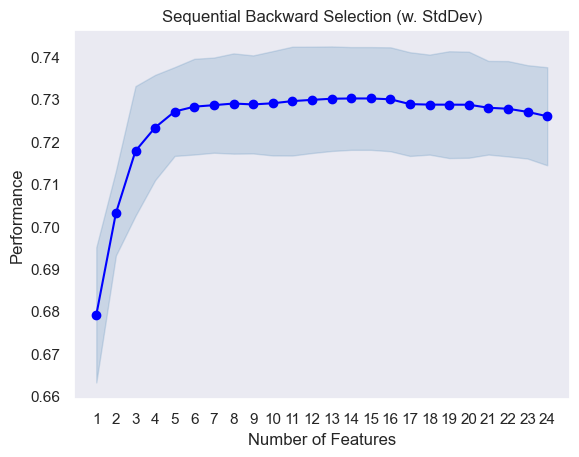

In [110]:
fig1 = plot_sfs(sfs_back.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

## Creation of Interactions

Now, we will consider the second-order interaction effects between the variables to assess whether they can contribute predictive power to the model.

We will generate the dataset with interactions of all variables and then apply selection methods to filter out the most interesting effects.

In [111]:
sel_col = ['const', 'age', 'sysBP', 'diaBP', 'glucose', 'prop_missings', 'age_sqr', 'cigsPerDay_raiz4', 'diaBP_sqr', 'BMI_sqr', 'glucose_exp', 'male_1.0', 'currentSmoker_1.0', 'prevalentStroke_1.0', 'prevalentHyp_1.0']

imput_dummy_red = imput_dummy[sel_col].drop(['const'], axis=1)
imput_dummy_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4238 non-null   int64  
 1   sysBP                4238 non-null   float64
 2   diaBP                4238 non-null   float64
 3   glucose              4238 non-null   float64
 4   prop_missings        4238 non-null   float64
 5   age_sqr              4238 non-null   float64
 6   cigsPerDay_raiz4     4238 non-null   float64
 7   diaBP_sqr            4238 non-null   float64
 8   BMI_sqr              4238 non-null   float64
 9   glucose_exp          4238 non-null   float64
 10  male_1.0             4238 non-null   bool   
 11  currentSmoker_1.0    4238 non-null   bool   
 12  prevalentStroke_1.0  4238 non-null   bool   
 13  prevalentHyp_1.0     4238 non-null   bool   
dtypes: bool(4), float64(9), int64(1)
memory usage: 380.8 KB


In [112]:
# Create interaction terms (interaction of each regressor pair + polynomial)
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
interaction

# Apply to our dataset
X_inter = pd.DataFrame(interaction.fit_transform(imput_dummy_red), columns=interaction.get_feature_names_out(input_features=imput_dummy_red.columns))
X_inter.shape


(4238, 105)

Some of these interactions occur between dummies for the same variable, which makes them meaningless, as the result will be all zeros. Therefore, to streamline the process, we remove the columns with zero variance from the dataset.

In [113]:
# Eliminate constant columns
X_inter = X_inter.loc[:, X_inter.var() != 0.0]

X_inter.shape

(4238, 105)

# Sequential Forward Selection
sfs_forw_int_best = sfs(clf, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='roc_auc',
          cv=4,n_jobs=-1)

sfs_forw_int_best = sfs_forw_int_best.fit(X_inter, varObjBin)

print('\nSequential Forward + Best Selection:')
print(sfs_forw_int_best.k_feature_names_)
print('CV Score:')
print(sfs_forw_int_best.k_score_)


fig1 = plot_sfs(sfs _forw_int_best.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward + Best Selection (interacciones) (w. StdDev)')
plt.grid()
plt.show()

In [114]:
# Sequential Forward Selection
sfs_forw_int_10 = sfs(clf, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='roc_auc',
          cv=4,n_jobs=-1)

sfs_forw_int_10 = sfs_forw_int_10.fit(X_inter, varObjBin)

print('\nSequential Forward 10 variables Selection:')
print(sfs_forw_int_10.k_feature_names_)
print('CV Score:')
print(sfs_forw_int_10.k_score_)


Sequential Forward 10 variables Selection:
None
CV Score:
None



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

When comparing the different models, there isn't a significant difference in the ROC AUC curve values. Therefore, and for its simplicity, the model with the original variables would be chosen due to its simplicity and interpretability. However, it is important to note that we are dealing with a class imbalance problem. For this reason, we will test other machine learning models to see if there is a more complex non-linear relationship between the variables that we cannot detect at first glance. Additionally, we will apply SMOTE techniques to balance the classes, since currently, there are many more people who will not experience a heart attack in 10 years (85% versus 15%). All of our models will tend to predict the majority class as "no heart attack" to achieve a higher accuracy. In our case, the goal is to correctly identify the highest number of individuals who will or will not suffer a heart attack in 10 years, that is, to identify the largest number of true positives and true negatives, thereby maximizing the recall and F1 score of our model.

### ORIGINAL MODEL

In [115]:
columns_to_drop = ['totChol', 'diaBP', 'BMI', 'heartRate', 'glucose', 
                       'prop_missings', 'currentSmoker', 'BPMeds', 
                       'prevalentHyp', 'aleatorio', 'aleatorio2']

In [116]:
heartDep = heart_df.drop(columns=columns_to_drop)

In [117]:
heartDep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 4237
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              4238 non-null   int32   
 1   cigsPerDay       4238 non-null   float64 
 2   sysBP            4238 non-null   float64 
 3   male             4238 non-null   category
 4   prevalentStroke  4238 non-null   category
 5   diabetes         4238 non-null   category
 6   TenYearCHD       4238 non-null   int64   
dtypes: category(3), float64(2), int32(1), int64(1)
memory usage: 161.8 KB


In [118]:
heartDep['male'] = heartDep['male'].astype(int)
heartDep['prevalentStroke'] = heartDep['prevalentStroke'].astype(int)
heartDep['diabetes'] = heartDep['diabetes'].astype(int)
heartDep.head(3)

age  cigsPerDay  sysBP  male  prevalentStroke  diabetes  TenYearCHD
0   39         0.0  106.0     1                0         0           0
1   46         0.0  121.0     0                0         0           0
2   48        20.0  127.5     1                0         0           0

In [119]:
varObjBin = heartDep.TenYearCHD
imputDep = heartDep.drop(['TenYearCHD'], axis=1) 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(imputDep, varObjBin, test_size=0.2, random_state=1234, stratify=varObjBin)

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (3390, 6) (3390,)
Testing dataset shape: (848, 6) (848,)


matriz de confusión
[[709  10]
 [119  10]]
accuracy
0.847877358490566
precision
0.5
recall
0.07751937984496124
f1
0.1342281879194631
AUC
0.7141432437386119


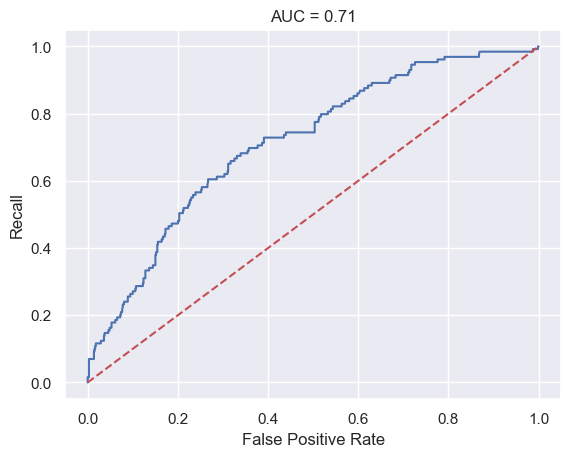

In [121]:
model1 = LogisticRegression().fit(X_train, y_train)
pred1 = model1.predict(X_test)
y_prob1 = model1.predict_proba(X_test)[:, 1]

saca_metricas(y_test, pred1, y_prob1)

In [122]:
print(metrics.classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       719
           1       0.50      0.08      0.13       129

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.53       848
weighted avg       0.80      0.85      0.80       848



### Original with Youden's cutoff point  = 0.15

matriz de confusión
[[455 264]
 [ 39  90]]
accuracy
0.6426886792452831
precision
0.2542372881355932
recall
0.6976744186046512
f1
0.37267080745341613
AUC
0.7141432437386119


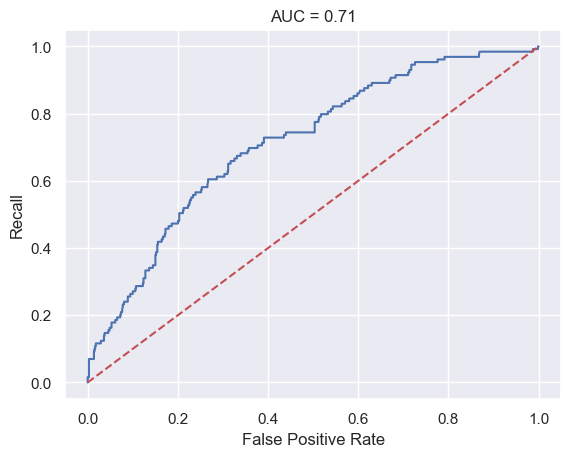

In [123]:
model2 = LogisticRegression().fit(X_train, y_train)
y_prob2 = model2.predict_proba(X_test)[:, 1]

umbral = 0.15
pred2_015 = (y_prob2 >= umbral).astype(int)

saca_metricas(y_test, pred2_015, y_prob2)

In [124]:
print(metrics.classification_report(y_test,pred2_015))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75       719
           1       0.25      0.70      0.37       129

    accuracy                           0.64       848
   macro avg       0.59      0.67      0.56       848
weighted avg       0.82      0.64      0.69       848



### SMOTE

In [126]:
print("Before OverSampling, counts of label '1': {}".format(sum(heartDep.TenYearCHD==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(heartDep.TenYearCHD==0)))

sm = SMOTE(random_state=2,sampling_strategy=1)
heartDep_res, y_heartDep_res = sm.fit_resample(heartDep.drop('TenYearCHD',axis=1), heartDep.TenYearCHD.ravel())

print('After OverSampling, the shape of train_X: {}'.format(heartDep_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_heartDep_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_heartDep_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_heartDep_res==0)))

Before OverSampling, counts of label '1': 644
Before OverSampling, counts of label '0': 3594 

After OverSampling, the shape of train_X: (7188, 6)
After OverSampling, the shape of train_y: (7188,) 

After OverSampling, counts of label '1': 3594
After OverSampling, counts of label '0': 3594


In [127]:
varObjBin = heartDep.TenYearCHD
imputDep = heartDep.drop(['TenYearCHD'], axis=1) # we're only going to keep the variables from our model selected

In [128]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(heartDep_res,
                                                    y_heartDep_res,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y_heartDep_res)

matriz de confusión
[[478 241]
 [253 466]]
accuracy
0.6564673157162726
precision
0.6591230551626591
recall
0.6481223922114048
f1
0.6535764375876578
AUC
0.7074769663475581


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



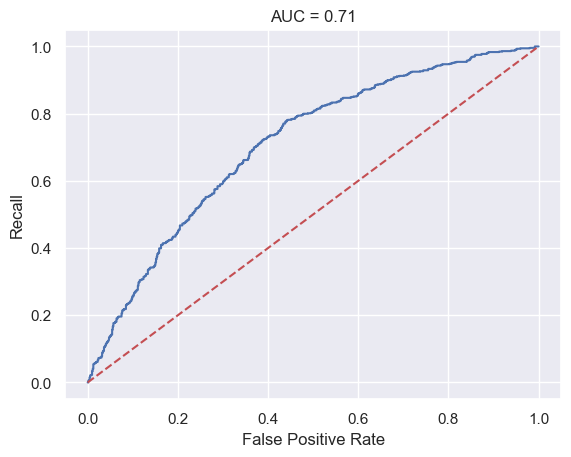

In [129]:
model_smote = LogisticRegression().fit(X_train_res,y_train_res)
y_pred_res = model_smote.predict(X_test_res)
y_prob_res = model_smote.predict_proba(X_test_res)[:, 1]

saca_metricas(y_test_res, y_pred_res, y_prob_res)

In [130]:
print(metrics.classification_report(y_test_res,y_pred_res))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       719
           1       0.66      0.65      0.65       719

    accuracy                           0.66      1438
   macro avg       0.66      0.66      0.66      1438
weighted avg       0.66      0.66      0.66      1438



### Smote + Cutoff Point = 0.15

Using the default 0.5 threshold is often not ideal, especially in imbalanced classification problems. So, by combining SMOTE and a threshold adjustment, we're both:

- Balancing the classes to make sure our model is learning from enough instances of both heart disease and non-heart disease cases.
- Fine-tuning the decision boundary to ensure that we're catching as many heart disease cases as possible (maximizing recall), even if that means accepting some false positives.

In healthcare, for instance, one may prefer a model that catches as many heart disease cases as possible, even if it means sending more patients for tests that ultimately turn out negative (false positives). The cost of missing a case of heart disease (false negative) could be far higher than the cost of unnecessary tests (false positives).

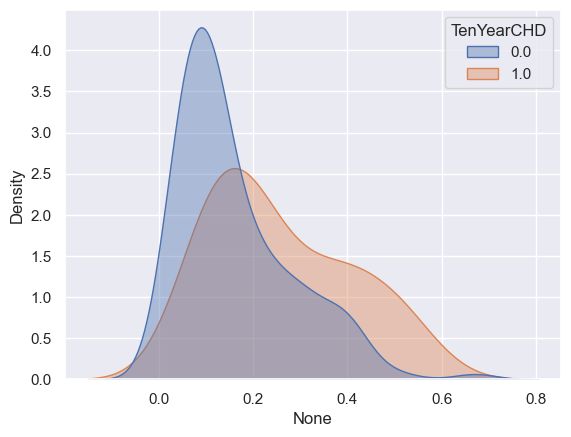

In [131]:
y_pred_res = model_smote.predict(X_test_res)

plt.clf()
sns.kdeplot(x=y_pred, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()

matriz de confusión
[[374 345]
 [144 575]]
accuracy
0.6599443671766342
precision
0.625
recall
0.799721835883171
f1
0.701647345942648
AUC
0.7074769663475581


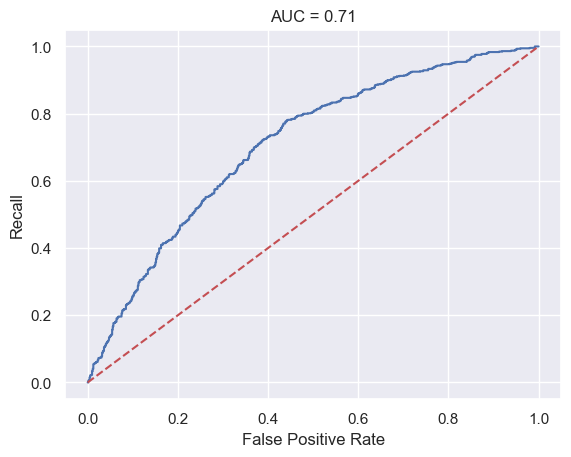

In [132]:
model_smote2 = LogisticRegression(max_iter=1000).fit(X_train_res,y_train_res)
y_pred_res2 = model_smote.predict(X_test_res)
y_prob_res2 = model_smote.predict_proba(X_test_res)[:, 1]

# Adjust cutoff to 0.41
umbral = 0.41
y_pred_res2_041 = (y_prob_res2 >= umbral).astype(int)

saca_metricas(y_test_res, y_pred_res2_041, y_prob_res2)

In [133]:
print(metrics.classification_report(y_test_res,y_pred_res2_041))

              precision    recall  f1-score   support

           0       0.72      0.52      0.60       719
           1       0.62      0.80      0.70       719

    accuracy                           0.66      1438
   macro avg       0.67      0.66      0.65      1438
weighted avg       0.67      0.66      0.65      1438



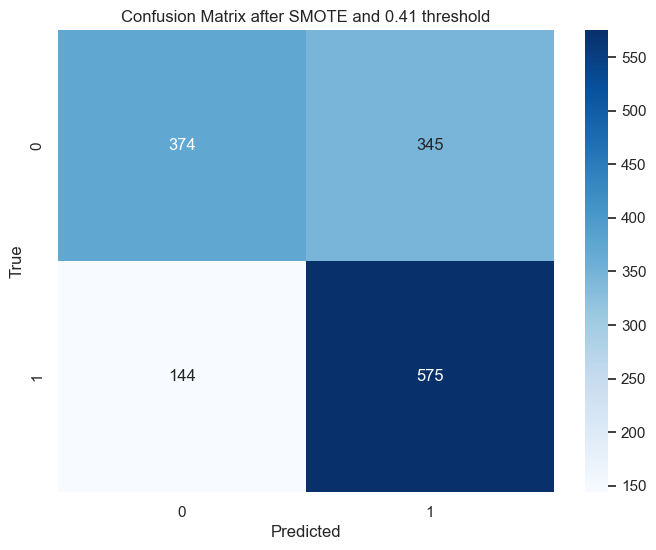

In [140]:
def plot_confusion_matrix(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix after SMOTE and 0.41 threshold')
    plt.show()

plot_confusion_matrix(y_test_res, y_pred_res2_041, labels)

Conclusion: This new model, with the threshold adjustment and SMOTE applied to balance the classes, shows a significant improvement in terms of recall for the positive class (heart disease) without sacrificing too much in precision. The main achievements are:

- A high recall of 0.80 for class 1 (heart disease), indicating that the model is identifying many more positive cases.
- An F1-score of 0.70 for class 1, which is quite good, meaning that the model is not sacrificing much precision for the high recall.
- Accuracy remains low due to the class imbalance, but this is not surprising given the context.

This model is quite solid because it meets the goal of maximizing the detection of positive cases (heart disease) while still being reasonably precise. 

In [135]:
results = cross_val_score(estimator=model_smote2, X=X_train_res, y=y_train_res, cv=5)
results

array([0.66      , 0.66173913, 0.65826087, 0.6373913 , 0.67391304])

In [136]:
print(results.mean())

0.6582608695652173


In [137]:
print(results.std())

0.011795356492391768


Standard deviation of ±1.18%: The model shows fairly consistent performance across different folds. The small variability (less than 1.2%) suggests that the model is robust and not overfitting to a particular data partition. There is no overfitting!

Remember, the final choice of the model always depends on the context and priorities. In this case, recall (minimizing false negatives) is more critical than precision, given that a false negative could be more serious (missing a heart attack case) since it could lead to a preventable death.